# Índice de Satisfação com a Vida

Neste notebook, vamos abordar o exercício do primeiro capítulo do livro. Trata-se de construir um modelo de regressão para prever o índice de satisfação da população de cada país, usando como parâmetro o PIB per capita de cada país.

Primeiramente, vamos replicar o modelo criado pelo autor com os dados referentes ao ano de 2020 e, depois, refazer o modelo com dados atualizados. Até a data de criação deste notebook, os dados disponíveis tanto para o PIB quanto para o Índice de Satisfação são referentes ao ano de 2024.

Vamos abordar a construção de um modelo de regressão, assim como a coleta dos dados e a preparação do conjunto de dados.


## Configuração do projeto

### Importando pacotes

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from utils.save_fig import save_fig

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [8]:
data_root = 'https://github.com/ageron/data/raw/main/'
lifesat = pd.read_csv(data_root + 'lifesat/lifesat.csv')
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [9]:
lifesat.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


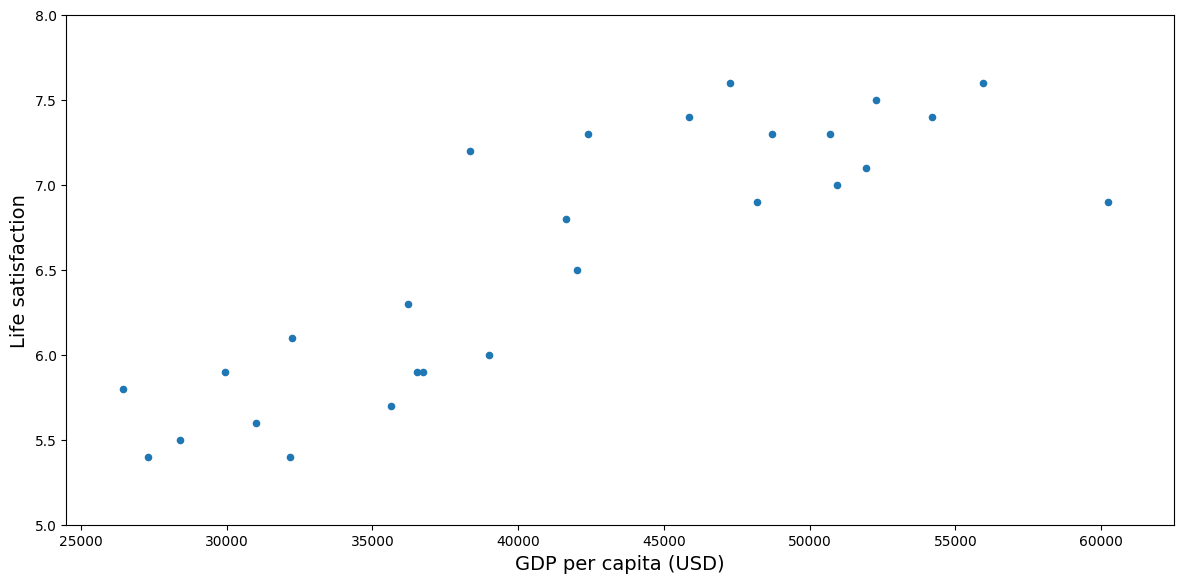

In [10]:
lifesat.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', figsize=(12, 6))
plt.axis([24_500, 62_500, 5, 8])
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_pt')
plt.show()

### Iniciando o modelo de regressão linear simples

In [11]:
X = lifesat[['GDP per capita (USD)']].values
y = lifesat['Life satisfaction'].values

print(f"Sample X values: {X[:5].ravel()}")
print(f"Sample y values: {y[:5]}")

model = LinearRegression()
model.fit(X, y)

Sample X values: [26456.38793813 27287.08340093 28384.98778463 29932.49391006
 31007.76840654]
Sample y values: [5.8 5.4 5.5 5.9 5.6]


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


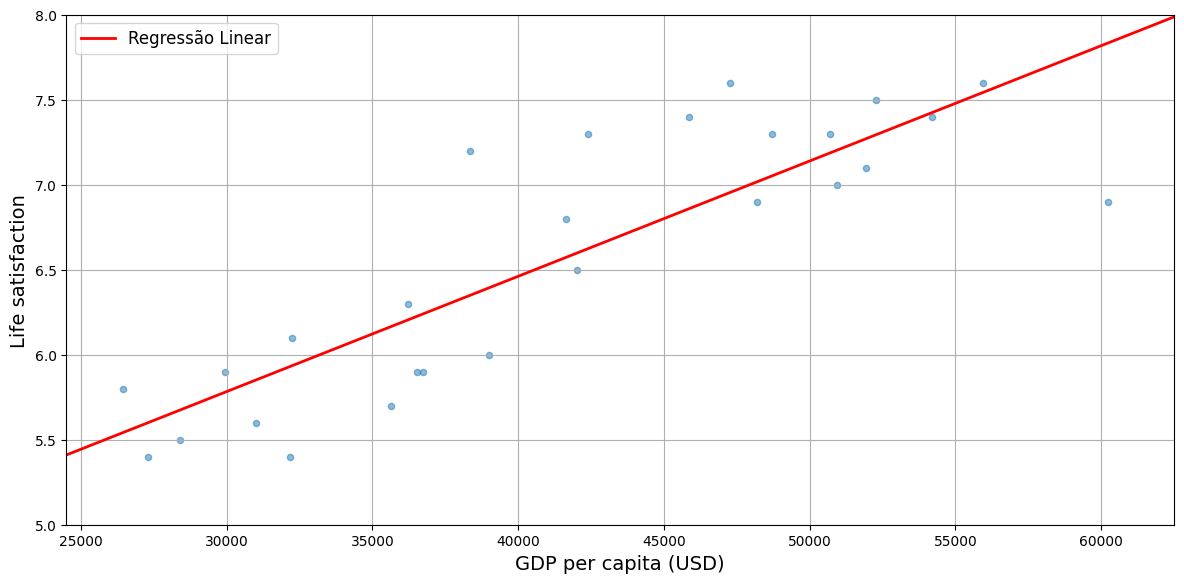

In [12]:
lifesat.plot(kind='scatter', grid=True, x='GDP per capita (USD)', y='Life satisfaction', figsize=(12, 6), alpha=0.5)

X_line = np.linspace(24500, 62500, 1000).reshape(-1, 1)
y_line = model.predict(X_line)

plt.plot(X_line, y_line, color='red', linewidth=2, label="Regressão Linear")

plt.axis([24500, 62500, 5, 8])
plt.legend()
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_with_line_pt')
plt.show()

Após treinar o modelo, vamos fazer a primeira previsão. Vamos identificar o índice de satisfação de Chipre, utilizando o seu PIB per capita de 2020, no valor de U$37,655.20.


In [13]:
X_new = [[37_655.2]]
cyprus_regression = model.predict(X_new)
print(cyprus_regression)

[6.30165767]


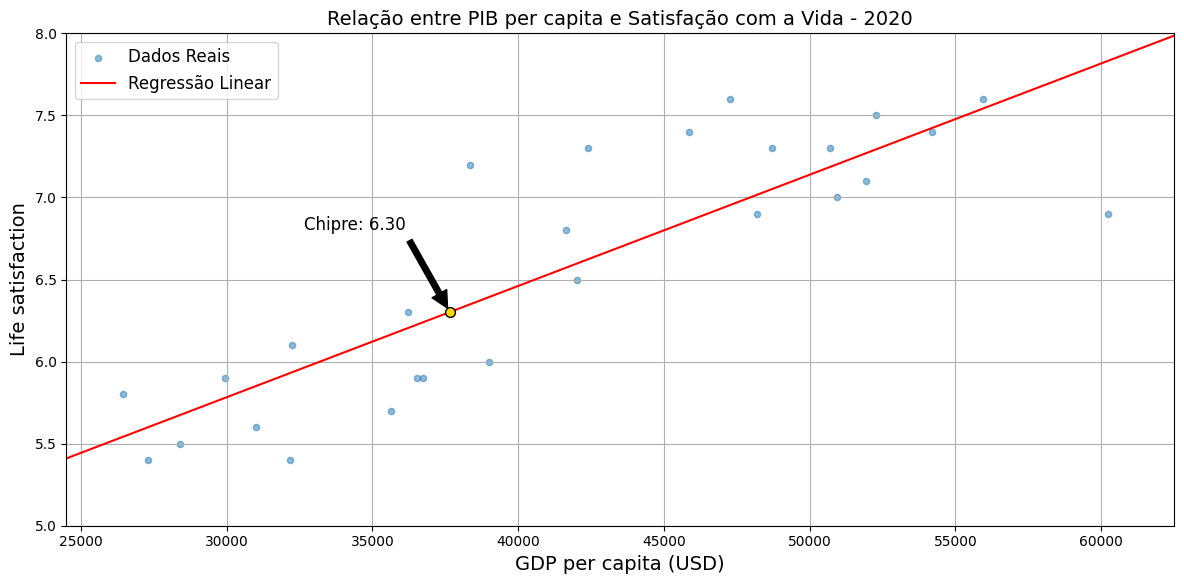

In [14]:
lifesat.plot(kind='scatter', grid=True, x='GDP per capita (USD)', y='Life satisfaction', label='Dados Reais', figsize=(12, 6), alpha=0.5)
X_line = np.linspace(24500, 62500, 1000).reshape(-1, 1)
plt.plot(X_line, model.predict(X_line), color='red',label="Regressão Linear")

cyprus_gdp = 37655.2
cyprus_predicted_sat = model.predict([[cyprus_gdp]]).item()

plt.scatter(cyprus_gdp, cyprus_predicted_sat, color='gold', s=50, edgecolors='black', zorder=5)

plt.annotate(f"Chipre: {cyprus_predicted_sat:.2f}", 
             xy=(cyprus_gdp, cyprus_predicted_sat), 
             xytext=(cyprus_gdp - 5000, cyprus_predicted_sat + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.axis([24500, 62500, 5, 8])
plt.legend()
plt.title("Relação entre PIB per capita e Satisfação com a Vida - 2020")
save_fig('lifesat_gdp_scatterplot_with_line_and_chipre_pt')
plt.tight_layout()
plt.show()

### Iniciando modelo KNeighborsRegressor

O autor aborda o uso de um algoritmo baseado em instâncias. O **KNeighborsRegressor** é um algoritmo de regressão baseado em vizinhos mais próximos (K-Nearest Neighbors) que prediz valores contínuos, em vez de categorias discretas.

O algoritmo opera de forma intuitiva: para prever o valor de um novo ponto, ele procura os **K pontos mais próximos** do conjunto de dados de treino e calcula a média dos valores desses vizinhos. Essa média se torna a predição para o novo ponto.

No livro, o autor configura o modelo com K = 3.


In [15]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)

In [16]:
model_knn.fit(X, y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Prevendo valor de satisfação para Chipre

In [17]:
cyprus_k_3 = model_knn.predict([[37_655.2]])
print(cyprus_k_3)

[6.33333333]


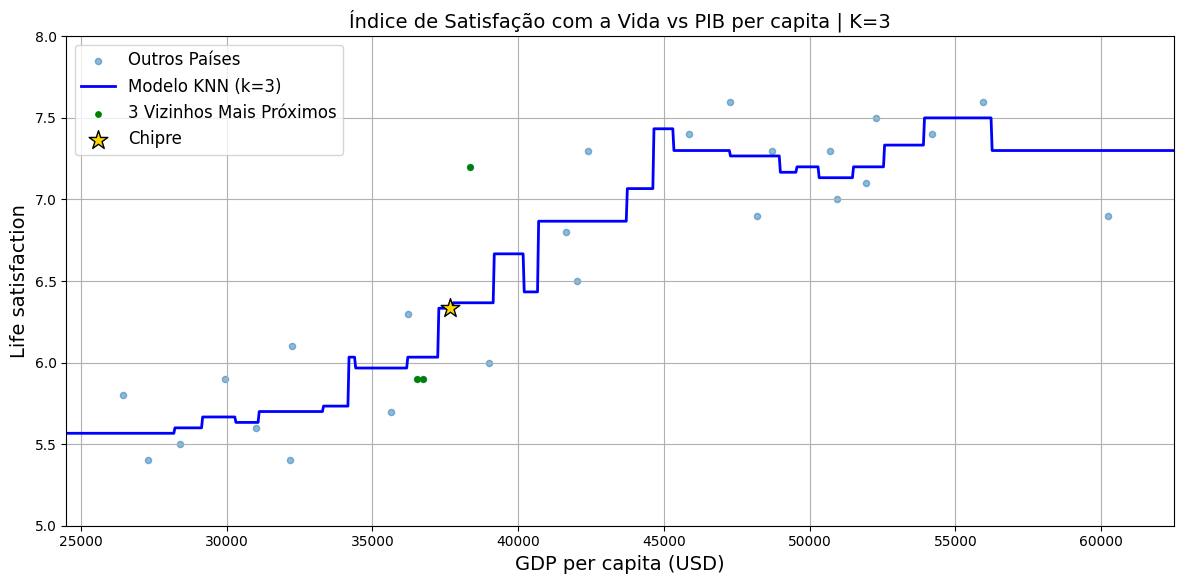

In [18]:
cyprus_gdp = [[37655.2]]
distances, indices = model_knn.kneighbors(cyprus_gdp)

X_smooth = np.linspace(24500, 62500, 1000).reshape(-1, 1)
y_knn_pred = model_knn.predict(X_smooth)

lifesat.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', 
             grid=True, alpha=0.5, label="Outros Países", figsize=(12, 6))

plt.plot(X_smooth, y_knn_pred, color='blue', label='Modelo KNN (k=3)', linewidth=2)

plt.scatter(X[indices[0]], y[indices[0]], 
            color='green', s=15, label='3 Vizinhos Mais Próximos', zorder=4)

cyprus_pred = model_knn.predict(cyprus_gdp).item()
plt.scatter(cyprus_gdp, cyprus_pred, color='gold', marker='*', s=200, 
            edgecolors='black', label='Chipre', zorder=5)

plt.axis([24500, 62500, 5, 8])
plt.legend()
plt.title("Índice de Satisfação com a Vida vs PIB per capita | K=3")
save_fig('lifesat_gdp_scatterplot_knn_k3_pt')
plt.tight_layout()
plt.show()

In [19]:
print('Valores de predição para Chipre:')
print(f'Regressão Linear: {cyprus_regression[0]:.4f}')
print(f'KNN (k=3): {cyprus_k_3[0]:.4f}')

Valores de predição para Chipre:
Regressão Linear: 6.3017
KNN (k=3): 6.3333


A diferença entre os resultados dos diferentes modelos acontece pela forma como cada um deles se comporta. A **Regressão Linear** utiliza todos os exemplos dos dados de treino para determinar a equação da reta, enquanto o **KNN** se baseia somente nos vizinhos próximos para estimar o valor médio do item que está sendo previsto. O ideal para o KNN é testar diferentes valores de K para entender como o modelo se comporta.


### Desafios do aprendizado de máquina: Qualidade dos Dados de Treinamento

A qualidade de um modelo de aprendizado de máquina está diretamente ligada aos dados utilizados durante o treinamento. Nesse caso, ela está relacionada à representatividade e à quantidade de dados disponíveis.

Para fazer boas generalizações, é imprescindível que os dados de treinamento representem os novos casos. O modelo que acabamos de criar é um exemplo de dados não representativos, pois foi treinado com dados de PIB per capita em um intervalo de $25,000.00 a $60,000.00, desconsiderando os países que se encontram acima ou abaixo desses valores.

Se treinarmos um modelo que utilize toda a base de dados, a equação da reta será alterada e, consequentemente, sua inclinação também.

Vamos ver a seguir.


## Obtendo o conjunto de dados completo

Agora vamos retreinar o modelo anterior, mas dessa vez vamos aumentar o intervalo do PIB e testar novamente com uma amostra maior, ainda do ano de 2020. 

In [20]:
import urllib.request
from pathlib import Path

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

Carregando dados do OECD - Better Life Index 

In [21]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


Carregando dados do PIB per capita do World Bank

In [22]:
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")
gdp_per_capita.head()


,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


Filtrando os dados pelo ano de 2020

In [23]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = 'Life satisfaction'

gdp_per_capita = gdp_per_capita[gdp_per_capita['Year'] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(['Code','Year'], axis=1)
gdp_per_capita.columns = ['Country', gdppc_col]
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


Vamos filtrar o conjunto de dados da OECD para obter os valores TOTAIS, pois os dados são separados em TOTAL, MEN, WOMEN, HIGH, LOW.

In [24]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Temos um total de 36 países listados no conjunto de dados da OECD

In [25]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[lifesat_col, gdppc_col]]

print(f"Total de países: {len(full_country_stats)}")
full_country_stats.head()

Total de países: 36


,Life satisfaction,GDP per capita (USD)
Country,,
South Africa,4.7,11466.189672
Colombia,6.3,13441.492952
Brazil,6.4,14063.982505
Mexico,6.5,17887.750736
Chile,6.5,23324.524751


Vamos filtrar por países que têm um PIB entre $23,500.00 e $62,500.00

In [26]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) & 
                                   (full_country_stats[gdppc_col] <= max_gdp)]

print(f"Total de países no intervalo selecionado: {len(country_stats)}")
country_stats.head()

Total de países no intervalo selecionado: 27


,Life satisfaction,GDP per capita (USD)
Country,,
Russia,5.8,26456.387938
Greece,5.4,27287.083401
Turkey,5.5,28384.987785
Latvia,5.9,29932.493910
Hungary,5.6,31007.768407


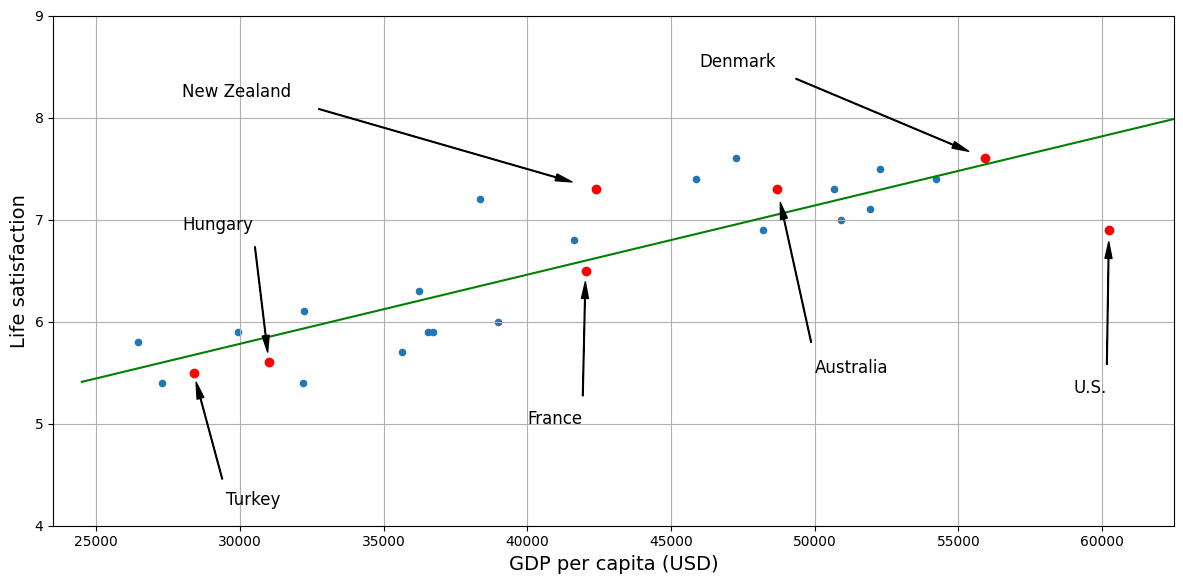

In [27]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, figsize=(12, 6))

min_lifesat = 4
max_lifesat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats.loc[country, gdppc_col]
    pos_data_y = country_stats.loc[country, lifesat_col]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, 
                 xy=(pos_data_x, pos_data_y), 
                 xytext=pos_text,
                 arrowprops=dict(facecolor='black', shrink=0.08, width=0.5, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
    
plt.plot(X_line, model.predict(X_line), color='green',label="Regressão Linear")
plt.axis([min_gdp, max_gdp, min_lifesat, max_lifesat])
save_fig('lifesat_gdp_scatterplot_with_line_and_annotations_pt')
plt.tight_layout()
plt.show()

In [28]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


In [29]:
X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


In [30]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(37655.1803457421)

In [31]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

np.float64(6.301656332738056)

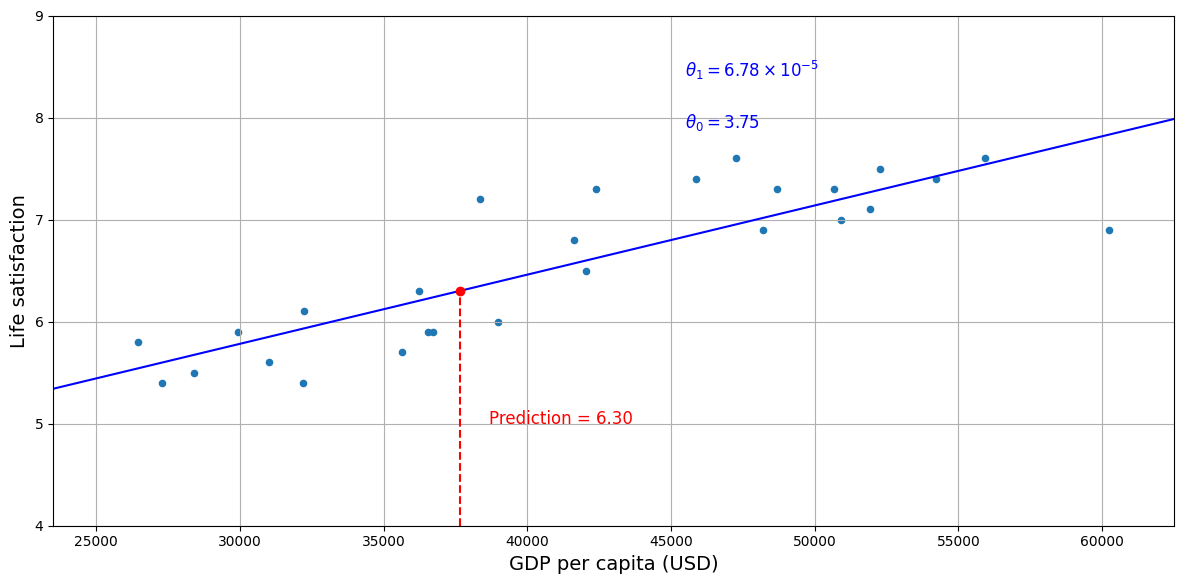

In [33]:
country_stats.plot(kind='scatter', figsize=(12, 6), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_lifesat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_lifesat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_lifesat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.axis([min_gdp, max_gdp, min_lifesat, max_lifesat])
save_fig('lifesat_gdp_scatterplot_with_line_and_annotations_pt')
plt.tight_layout()
plt.show()

In [34]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,Life satisfaction,GDP per capita (USD)
Country,,
South Africa,4.7,11466.189672
Colombia,6.3,13441.492952
Brazil,6.4,14063.982505
Mexico,6.5,17887.750736
Chile,6.5,23324.524751
Norway,7.6,63585.903514
Switzerland,7.5,68393.306004
Ireland,7.0,89688.956958
Luxembourg,6.9,110261.157353


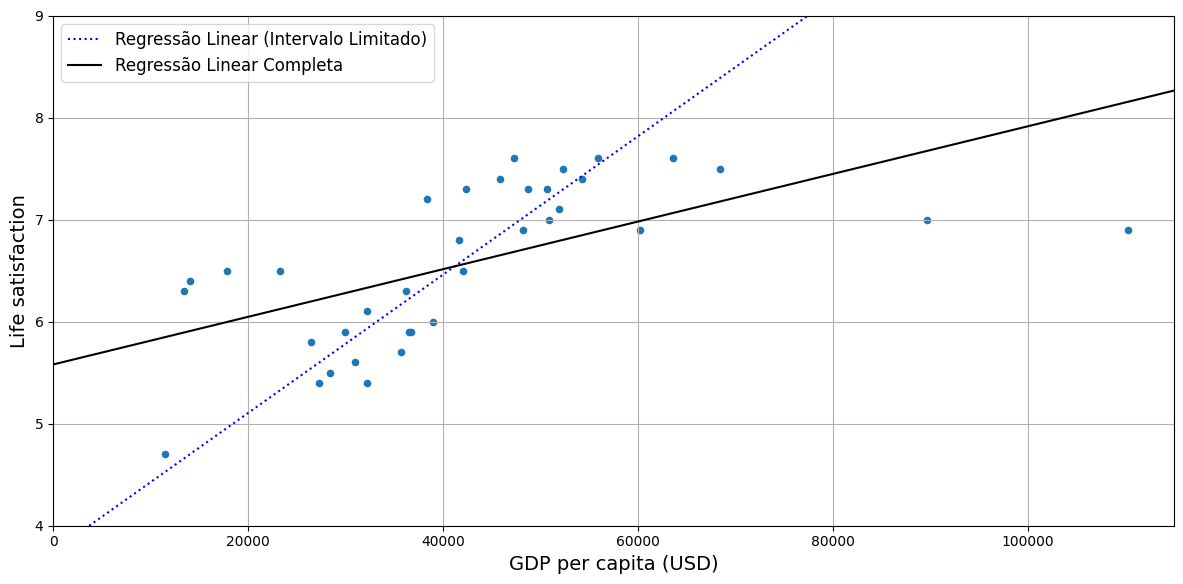

In [36]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

full_country_stats.plot(kind='scatter', figsize=(12, 6),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:", label="Regressão Linear (Intervalo Limitado)")

lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k", label="Regressão Linear Completa")

plt.axis([0, 115_000, min_lifesat, max_lifesat])
plt.legend()
save_fig('lifesat_gdp_scatterplot_with_full_line_and_annotations_pt')
plt.tight_layout()
plt.show()

Acima podemos ver nitidamente o que foi dito anteriormente como representatividade dos dados. É importante que os dados sejam representativos quando o intuito do modelo é fazer previsões de forma generalizada. 

Se a amostra for muito pequena, existirá ruído, mas uma amostra muito grande pode não representar o conjunto como um todo, dessa forma é preciso identificar possíveis outliers, ou apenas identificar que determinado item da amostra, não condiz com a realidade do conjunto. 

### Dados de Baixa Qualidade

É importante que os dados sejam devidamente tratados antes de iniciar a construção de um modelo de aprendizado de máquina. Essa é, sem dúvidas, a etapa mais importante e aquela em que se deve gastar mais tempo.

Nessa etapa, buscamos identificar o padrão dos dados, entender o que é ou não um valor atípico (`outlier`) e analisar a distribuição do conjunto de dados.

Se algumas instâncias são claramente valores atípicos, apenas descartá-las pode ajudar, ou, se for o caso, também é possível realizar algum tipo de tratamento e transformação.

Caso faltem dados em algumas instâncias, é preciso decidir se toda a variável será descartada, ou somente os itens em que os dados estão nulos; se o melhor é preencher com o valor da média ou da mediana do conjunto; ou até mesmo treinar um modelo com essa variável e outro sem ela.


### Regularização dos Dados

Chamamos de regularização quando restringimos o modelo para simplificar e reduzir o risco de overfitting. Queremos encontrar o equilíbrio certo entre o ajuste perfeito dos dados e a necessidade de manter o modelo simples o bastante para garantir que ele generalize bem.

**Ridge Regression** é uma técnica de regularização que estende a regressão linear adicionando uma penalidade à soma dos quadrados dos coeficientes, em vez de simplesmente minimizar o erro quadrático residual.

Ao penalizar coeficientes grandes, o modelo fica menos adaptado aos ruídos dos dados limitados. Em conjuntos de dados pequenos, evita que valores atípicos forcem inclinações extremas. Também controla a multicolinearidade entre variáveis, tornando o ajuste mais robusto.


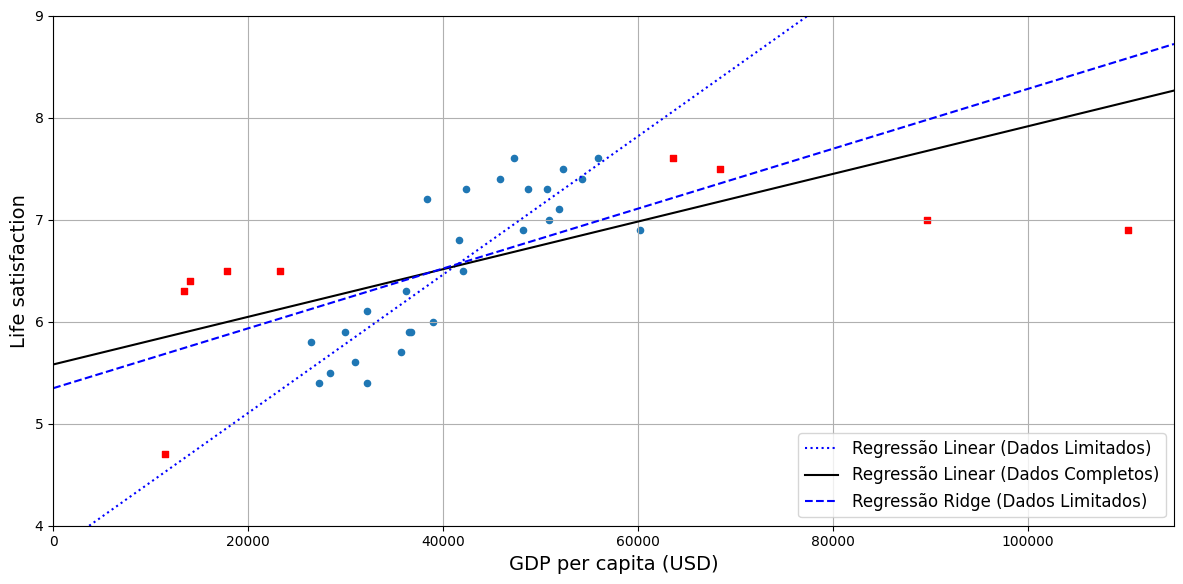

In [37]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(12, 6), grid=True)
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Regressão Linear (Dados Limitados)")
plt.plot(X, t0full + t1full * X, "k-", label="Regressão Linear (Dados Completos)")

ridge = Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regressão Ridge (Dados Limitados)")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_lifesat, max_lifesat])
save_fig('lifesat_gdp_scatterplot_with_full_line_and_annotations_pt')
plt.tight_layout()
plt.show()

# Atualizando o Modelo

Agora que replicamos o exercício do livro, vamos reconstruí-lo do zero, obtendo os dados atualizados, testando novas abordagens e avaliando como aplicar esse modelo na vida real.

Vamos abordar:

* Coleta
* Preparação
* Análise exploratória
* Construção dos modelos


## Obtendo dados

### Better Life Index da OECD

In [38]:
import requests

url = 'https://sdmx.oecd.org/archive/rest/data/OECD,DF_BLI,/all?dimensionAtObservation=AllDimensions'
headers = {'Accept': 'application/json'}

r = requests.get(url, headers=headers)

if r.status_code == 200:
    data = r.json()
    print("Successo!")
else:
    print(f"Error {r.status_code}: {r.text[:200]}")

Successo!


### Explorando JSON

In [39]:
data.keys()

dict_keys(['header', 'dataSets', 'structure'])

In [40]:
data['header']

{'id': 'IREF000325',
 'prepared': '2026-02-18T01:02:26Z',
 'test': False,
 'sender': {'id': 'Archive', 'name': 'unknown'}}

In [41]:
data['dataSets'][0].keys()

dict_keys(['action', 'observations'])

In [42]:
data['dataSets'][0]['observations']

{'0:0:0': [2.3, 0, 0, 0, None],
 '1:0:0': [2.4, 0, 0, 0, None],
 '2:0:0': [3.8, 0, 0, 0, None],
 '3:0:0': [2.3, 0, 0, 0, None],
 '4:0:0': [4.5, 0, 0, 0, None],
 '5:0:0': [2.2, 0, 0, 0, None],
 '6:0:0': [3.1, 0, 0, 0, None],
 '7:0:0': [1.4, 0, 0, 0, None],
 '8:0:0': [21.7, 0, 0, 0, None],
 '9:0:0': [3.8, 0, 0, 0, None],
 '10:0:0': [1, 0, 0, 0, None],
 '11:0:0': [2.6, 0, 0, 0, None],
 '12:0:0': [8.6, 0, 0, 0, None],
 '13:0:0': [2.7, 0, 0, 0, None],
 '14:0:0': [2.9, 0, 0, 0, None],
 '15:0:0': [2.2, 0, 0, 0, None],
 '16:0:0': [4, 0, 0, 0, None],
 '17:0:0': [2.5, 0, 0, 0, None],
 '18:0:0': [4.5, 0, 0, 0, None],
 '19:0:0': [2.8, 0, 0, 0, None],
 '20:0:0': [5, 0, 0, 0, None],
 '21:0:0': [8.1, 0, 0, 0, None],
 '22:0:0': [8.8, 0, 0, 0, None],
 '23:0:0': [15.8, 0, 0, 0, None],
 '24:0:0': [4.4, 0, 0, 0, None],
 '25:0:0': [13, 0, 0, 0, None],
 '26:0:0': [3.3, 0, 0, 0, None],
 '27:0:0': [4.2, 0, 0, 0, None],
 '28:0:0': [7, 0, 0, 0, None],
 '29:0:0': [5.4, 0, 0, 0, None],
 '30:0:0': [4.6, 0, 0, 0, N

In [43]:
data['structure'].keys()

dict_keys(['name', 'description', 'dimensions', 'attributes', 'annotations'])

In [44]:
data['structure']['name']

'Better Life Index'

In [45]:
data['structure']['description']

''

In [46]:
data['structure']['dimensions'].keys()

dict_keys(['dataset', 'series', 'observation'])

In [47]:
data['structure']['dimensions']['dataset']

[]

In [48]:
data['structure']['dimensions']['series']

[]

In [49]:
data['structure']['dimensions']['observation'][0].keys()

dict_keys(['id', 'name', 'keyPosition', 'role', 'values'])

In [50]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['id'])

LOCATION
INDICATOR
MEASURE
INEQUALITY


In [51]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['name'])

Country
Indicator
Measure
Inequality


In [52]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['keyPosition'])

0
1
2
3


In [53]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['role'])

LOCATION
INDICATOR
MEASURE
INEQUALITY


In [54]:
for i in range(4):
    print(data['structure']['dimensions']['observation'][i]['values'])

[{'id': 'AUT', 'name': 'Austria'}, {'id': 'BEL', 'name': 'Belgium'}, {'id': 'CAN', 'name': 'Canada'}, {'id': 'CZE', 'name': 'Czechia'}, {'id': 'DNK', 'name': 'Denmark'}, {'id': 'FIN', 'name': 'Finland'}, {'id': 'FRA', 'name': 'France'}, {'id': 'DEU', 'name': 'Germany'}, {'id': 'GRC', 'name': 'Greece'}, {'id': 'HUN', 'name': 'Hungary'}, {'id': 'ISL', 'name': 'Iceland'}, {'id': 'IRL', 'name': 'Ireland'}, {'id': 'ITA', 'name': 'Italy'}, {'id': 'JPN', 'name': 'Japan'}, {'id': 'KOR', 'name': 'Korea'}, {'id': 'LUX', 'name': 'Luxembourg'}, {'id': 'MEX', 'name': 'Mexico'}, {'id': 'NLD', 'name': 'Netherlands'}, {'id': 'NZL', 'name': 'New Zealand'}, {'id': 'NOR', 'name': 'Norway'}, {'id': 'POL', 'name': 'Poland'}, {'id': 'PRT', 'name': 'Portugal'}, {'id': 'SVK', 'name': 'Slovak Republic'}, {'id': 'ESP', 'name': 'Spain'}, {'id': 'SWE', 'name': 'Sweden'}, {'id': 'TUR', 'name': 'Türkiye'}, {'id': 'GBR', 'name': 'United Kingdom'}, {'id': 'USA', 'name': 'United States'}, {'id': 'CHL', 'name': 'Chile'

In [55]:
observations = data['dataSets'][0]['observations']
dims = data['structure']['dimensions']['observation']

map_list = {d['keyPosition']: d['values'] for d in dims}

In [56]:
map_list[0]

[{'id': 'AUT', 'name': 'Austria'},
 {'id': 'BEL', 'name': 'Belgium'},
 {'id': 'CAN', 'name': 'Canada'},
 {'id': 'CZE', 'name': 'Czechia'},
 {'id': 'DNK', 'name': 'Denmark'},
 {'id': 'FIN', 'name': 'Finland'},
 {'id': 'FRA', 'name': 'France'},
 {'id': 'DEU', 'name': 'Germany'},
 {'id': 'GRC', 'name': 'Greece'},
 {'id': 'HUN', 'name': 'Hungary'},
 {'id': 'ISL', 'name': 'Iceland'},
 {'id': 'IRL', 'name': 'Ireland'},
 {'id': 'ITA', 'name': 'Italy'},
 {'id': 'JPN', 'name': 'Japan'},
 {'id': 'KOR', 'name': 'Korea'},
 {'id': 'LUX', 'name': 'Luxembourg'},
 {'id': 'MEX', 'name': 'Mexico'},
 {'id': 'NLD', 'name': 'Netherlands'},
 {'id': 'NZL', 'name': 'New Zealand'},
 {'id': 'NOR', 'name': 'Norway'},
 {'id': 'POL', 'name': 'Poland'},
 {'id': 'PRT', 'name': 'Portugal'},
 {'id': 'SVK', 'name': 'Slovak Republic'},
 {'id': 'ESP', 'name': 'Spain'},
 {'id': 'SWE', 'name': 'Sweden'},
 {'id': 'TUR', 'name': 'Türkiye'},
 {'id': 'GBR', 'name': 'United Kingdom'},
 {'id': 'USA', 'name': 'United States'},
 {

In [57]:
map_list[1]

[{'id': 'JE_LMIS', 'name': 'Labour market insecurity'},
 {'id': 'HO_BASE', 'name': 'Dwellings without basic facilities'},
 {'id': 'PS_FSAFEN', 'name': 'Feeling safe walking alone at night'},
 {'id': 'HO_HISH', 'name': 'Housing expenditure'},
 {'id': 'JE_EMPL', 'name': 'Employment rate'},
 {'id': 'JE_LTUR', 'name': 'Long-term unemployment rate'},
 {'id': 'SC_SNTWS', 'name': 'Quality of support network'},
 {'id': 'ES_EDUA', 'name': 'Educational attainment'},
 {'id': 'EQ_WATER', 'name': 'Water quality'},
 {'id': 'CG_VOTO', 'name': 'Voter turnout'},
 {'id': 'HS_SFRH', 'name': 'Self-reported health'},
 {'id': 'WL_EWLH', 'name': 'Employees working very long hours'},
 {'id': 'CG_SENG',
  'name': 'Stakeholder engagement for developing regulations'},
 {'id': 'ES_STCS', 'name': 'Student skills'},
 {'id': 'SW_LIFS', 'name': 'Life satisfaction'},
 {'id': 'HO_NUMR', 'name': 'Rooms per person'},
 {'id': 'IW_HADI', 'name': 'Household net adjusted disposable income'},
 {'id': 'IW_HNFW', 'name': 'House

In [58]:
map_list[2]

[{'id': 'L', 'name': 'Value'}]

In [59]:
map_list[3]

[{'id': 'TOT', 'name': 'Total'},
 {'id': 'WMN', 'name': 'Women'},
 {'id': 'MN', 'name': 'Men'},
 {'id': 'LW', 'name': 'Low'},
 {'id': 'HGH', 'name': 'High'}]

### Construindo conjunto de dados

In [60]:
countries = {i: v['name'] for i, v in enumerate(dims[0]['values'])}
indicators = {i: v['name'] for i, v in enumerate(dims[1]['values'])}
inequalities = {i: v['name'] for i, v in enumerate(dims[3]['values'])}

rows = []
for key, val in observations.items():
    indices = [int(i) for i in key.split(':')]
    
    inequality_idx = indices[3] if len(indices) > 3 else 0
    
    if inequalities[inequality_idx] == 'Total':
        rows.append({
            'Country': countries[indices[0]],
            'Indicator': indicators[indices[1]],
            'Value': val[0]
        })

In [61]:
df_oecd = pd.DataFrame(rows)
df_oecd.head()

,Country,Indicator,Value
0,Austria,Labour market insecurity,2.3
1,Belgium,Labour market insecurity,2.4
2,Canada,Labour market insecurity,3.8
3,Czechia,Labour market insecurity,2.3
4,Denmark,Labour market insecurity,4.5


In [62]:
oecd = df_oecd.pivot(index="Country", columns="Indicator", values="Value")

df_oecd = oecd.reset_index(drop=True)

oecd.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,6.1,69.0,81.0,0.6,37433.0,528768.0,19.4,...,55206.0,96.0,NaN,84.0,2.7,460.0,13.65,92.0,91.0,21.0
Austria,12.2,0.8,83.0,2.4,68.0,82.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,61.0,1.3,440.0,14.31,76.0,92.0,17.0
Belgium,12.8,0.7,81.0,2.6,61.0,47.0,0.8,34884.0,447607.0,20.0,...,54327.0,88.0,2.1,57.0,2.0,440.0,15.33,88.0,77.0,20.0
Brazil,11.7,6.7,60.0,3.6,47.0,34.0,3.3,NaN,NaN,NaN,...,NaN,86.0,NaN,NaN,2.2,373.0,NaN,80.0,71.0,16.0
Canada,7.1,0.2,94.0,1.2,67.0,67.0,0.7,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,81.0,2.9,485.0,14.47,68.0,87.0,17.0


In [63]:
oecd.transpose()

Country,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
Indicator,,,,,,,,,,,,,,,,,,,,,
Air pollution,6.70,12.20,12.80,11.7,7.10,23.4,22.6,17.5,17.0,10.0,...,11.8,18.5,17.0,28.5,10.00,5.8,10.1,27.10,10.10,7.70
Dwellings without basic facilities,NaN,0.80,0.70,6.7,0.20,9.4,12.3,2.3,0.5,0.5,...,13.8,1.5,0.2,35.9,0.30,0.0,0.0,4.90,0.50,0.10
Educational attainment,84.00,83.00,81.00,60.0,94.00,68.0,61.0,44.0,93.0,83.0,...,96.0,92.0,91.0,48.0,66.00,85.0,88.0,38.00,83.00,92.00
Employees working very long hours,6.10,2.40,2.60,3.6,1.20,5.0,17.1,12.7,2.0,0.1,...,0.1,2.0,2.9,10.4,1.40,0.5,0.3,20.10,6.30,6.60
Employment rate,69.00,68.00,61.00,47.0,67.00,47.0,45.0,41.0,67.0,71.0,...,65.0,62.0,68.0,33.0,57.00,74.0,76.0,30.00,72.00,62.00
Feeling safe walking alone at night,81.00,82.00,47.00,34.0,67.00,30.0,45.0,36.0,77.0,77.0,...,55.0,67.0,85.0,35.0,75.00,68.0,81.0,45.00,77.00,69.00
Homicide rate,0.60,0.50,0.80,3.3,0.70,0.7,4.1,1.8,0.6,0.4,...,2.2,0.6,0.3,3.6,0.50,0.5,0.3,0.50,0.10,2.50
Household net adjusted disposable income,37433.00,37001.00,34884.00,NaN,34421.00,NaN,NaN,16517.0,26664.0,33774.0,...,19546.0,21149.0,25250.0,9338.0,27155.00,33730.0,39697.0,NaN,33049.00,51147.00
Household net wealth,528768.00,309637.00,447607.00,NaN,478240.00,135787.0,NaN,NaN,NaN,149864.0,...,NaN,171425.0,233286.0,NaN,366534.00,NaN,NaN,NaN,524422.00,684500.00


In [64]:
oecd_mean = oecd.transpose()
oecd_mean['Mean'] = oecd_mean.mean(axis=1)
oecd_mean['Mean'].round(2)

Indicator
Air pollution                                            13.52
Dwellings without basic facilities                        4.26
Educational attainment                                   78.98
Employees working very long hours                         4.35
Employment rate                                          62.21
Feeling safe walking alone at night                      65.07
Homicide rate                                             1.05
Household net adjusted disposable income              29598.58
Household net wealth                                 323959.63
Housing expenditure                                      20.35
Labour market insecurity                                  5.18
Life expectancy                                          83.00
Life satisfaction                                         6.57
Long-term unemployment rate                               2.35
Personal earnings                                     43933.06
Quality of support network                   

#### Salvando conjunto de dados

In [65]:
oecd.to_csv('datasets/oecd/oecd_bli_2024.csv')

### PIB per capita do World Bank 


In [66]:
import requests
import zipfile
import io
import pandas as pd

url = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv'

response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    csv_files = [f for f in z.namelist() if f.startswith('API')]
    
    if csv_files:
        target_file = csv_files[0]
        with z.open(target_file) as f:
            df_gdp = pd.read_csv(f, skiprows=4)

In [67]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.550214,28440.041688,30082.158423,30645.890602,22759.807175,26749.329609,30975.998912,35718.753119,39498.594129,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.089204,186.909053,197.367547,225.400079,208.962717,226.836135,...,1334.470500,1528.104224,1552.073722,1507.085600,1351.591669,1562.416175,1679.327622,1571.449189,1615.396356,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.936832,127.451040,133.823783,139.004980,148.545883,155.561897,...,1630.039439,1574.230564,1720.140092,2216.385055,2030.861659,2112.794076,2138.473153,1841.855064,1411.337029,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2051.814621,2790.718869,2860.093648,2493.678844,1759.356199,2303.908127,3682.113151,2916.136633,2665.874448,NaN


### Construindo conjunto de dados

In [68]:
years = [str(year) for year in range(1960, 2026) if str(year) in df_gdp.columns]

gdp = df_gdp.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=years,
    var_name='Year',
    value_name='GDP per capita (USD)'
)

gdp.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'}, inplace=True)

gdp['Year'] = gdp['Year'].astype(int)
gdp = gdp.sort_values(by=['Entity', 'Year']).reset_index(drop=True)
gdp.dropna(subset=['GDP per capita (USD)'], inplace=True)
gdp

,Entity,Code,Year,GDP per capita (USD)
40,Afghanistan,AFG,2000,174.930991
41,Afghanistan,AFG,2001,138.706822
42,Afghanistan,AFG,2002,178.954088
43,Afghanistan,AFG,2003,198.871116
44,Afghanistan,AFG,2004,221.763654
...,...,...,...,...
17285,Zimbabwe,ZWE,2020,2059.674454
17286,Zimbabwe,ZWE,2021,2613.605421
17287,Zimbabwe,ZWE,2022,2536.400502
17288,Zimbabwe,ZWE,2023,2195.224921


### Salvando conjunto de dados

In [70]:
gdp.to_csv('../datasets/world_bank/gdp_per_capita_2024.csv', index=False)

## Preparando os dados para análise e construção do modelo

In [71]:
lifesat = pd.read_csv(Path('datasets/oecd/oecd_bli_2024.csv'))
lifesat.head()

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,6.7,NaN,84.0,6.1,69.0,81.0,0.6,37433.0,528768.0,...,55206.0,96.0,NaN,84.0,2.7,460.0,13.65,92.0,91.0,21.0
1,Austria,12.2,0.8,83.0,2.4,68.0,82.0,0.5,37001.0,309637.0,...,53132.0,92.0,1.6,61.0,1.3,440.0,14.31,76.0,92.0,17.0
2,Belgium,12.8,0.7,81.0,2.6,61.0,47.0,0.8,34884.0,447607.0,...,54327.0,88.0,2.1,57.0,2.0,440.0,15.33,88.0,77.0,20.0
3,Brazil,11.7,6.7,60.0,3.6,47.0,34.0,3.3,NaN,NaN,...,NaN,86.0,NaN,NaN,2.2,373.0,NaN,80.0,71.0,16.0
4,Canada,7.1,0.2,94.0,1.2,67.0,67.0,0.7,34421.0,478240.0,...,55342.0,93.0,2.6,81.0,2.9,485.0,14.47,68.0,87.0,17.0


In [72]:
lifesat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air pollution,42.0,13.521429,6.316163,5.50,8.725,12.10,17.000,28.50
Dwellings without basic facilities,39.0,4.261538,7.491526,0.00,0.200,0.70,5.300,35.90
Educational attainment,41.0,78.975610,15.662835,38.00,74.000,83.00,91.000,96.00
Employees working very long hours,40.0,4.352500,4.943786,0.10,1.275,2.30,6.025,20.10
Employment rate,42.0,62.214286,11.742223,30.00,57.500,66.00,71.000,76.00
Feeling safe walking alone at night,42.0,65.071429,15.739329,30.00,56.750,68.50,77.000,89.00
Homicide rate,42.0,1.052381,1.181202,0.10,0.400,0.60,1.000,5.50
Household net adjusted disposable income,36.0,29598.583333,8753.975532,9338.00,23756.750,29459.50,34909.000,51147.00
Household net wealth,30.0,323959.633333,182301.797043,79245.00,198978.250,294877.50,369389.250,941162.00
Housing expenditure,38.0,20.350000,2.479402,14.70,18.400,20.30,21.775,27.40


In [74]:
gdp_raw = pd.read_csv(Path('../datasets/world_bank/gdp_per_capita_2024.csv'))
gdp = gdp_raw[gdp_raw['Year'] == 2024].copy()
print(f"Total de países/regiões com dados de PIB per capita para 2024: {len(gdp)}")
gdp.head()

Total de países/regiões com dados de PIB per capita para 2024: 240


,Entity,Code,Year,GDP per capita (USD)
88,Africa Eastern and Southern,AFE,2024,1615.396356
153,Africa Western and Central,AFW,2024,1411.337029
198,Albania,ALB,2024,11377.775743
263,Algeria,DZA,2024,5752.990767
339,Andorra,AND,2024,49303.649167


In [75]:
regions = ['Africa Eastern and Southern','Africa Western and Central','Arab World',
 'Caribbean small states','Central African Republic','Central Europe and the Baltics',
 'Early-demographic dividend','East Asia & Pacific','East Asia & Pacific (IDA & IBRD countries)','East Asia & Pacific (excluding high income)',
 'Euro area','Europe & Central Asia','Europe & Central Asia (IDA & IBRD countries)','Europe & Central Asia (excluding high income)','European Union',
 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)','High income','IBRD only','IDA & IBRD total',
 'IDA blend','IDA only','IDA total','Late-demographic dividend','Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)','Least developed countries: UN classification','Low & middle income','Low income','Lower middle income',
 'Middle East, North Africa, Afghanistan & Pakistan','Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)',
 'Middle East, North Africa, Afghanistan & Pakistan (excluding high income)', 'Middle income', 'North America', 'OECD members', 'Other small states',
 'Pacific island small states','Post-demographic dividend','Pre-demographic dividend', 'Small states','South Africa','South Asia','South Asia (IDA & IBRD)',
 'Sub-Saharan Africa','Sub-Saharan Africa (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)','Upper middle income','West Bank and Gaza','World'
 ]

Separando os dados do PIB entre regiões e países


In [76]:
gdp_regions = gdp[gdp['Entity'].isin(regions)]
print(f"Total de regiões/agrupamentos: {len(gdp_regions)}")
gdp_countries = gdp[~gdp['Entity'].isin(regions)]
print(f"Total de países com dados de PIB per capita para 2024: {len(gdp_countries)}")

Total de regiões/agrupamentos: 51
Total de países com dados de PIB per capita para 2024: 189


Criando `df_raw` para ser o conjunto de dados com o mesmo formato do exercício do livro.


In [77]:
df_raw = pd.merge(lifesat[['Country','Life satisfaction']], gdp_countries, left_on='Country', right_on='Entity', how='inner')
df_raw.drop(columns=['Entity','Code', 'Year'], inplace=True)
print(f"Total de países combinados entre os datasets: {len(df_raw)}")
df_raw.head()

Total de países combinados entre os datasets: 37


,Country,Life satisfaction,GDP per capita (USD)
0,Australia,7.0,64603.985631
1,Austria,7.2,58268.878765
2,Belgium,6.7,56614.567950
3,Brazil,6.4,10310.548878
4,Canada,6.9,54340.347722


## Análise Exploratória 

In [78]:
df_raw.sort_values(by='GDP per capita (USD)',ascending=False)

,Country,Life satisfaction,GDP per capita (USD)
23,Luxembourg,7.4,137781.681659
17,Ireland,7.3,112894.953241
34,Switzerland,7.4,103998.186686
27,Norway,7.2,86785.433449
16,Iceland,7.8,86040.530985
36,United States,6.9,84534.040784
9,Denmark,7.5,71026.483227
25,Netherlands,7.4,67520.421896
0,Australia,7.0,64603.985631
1,Austria,7.2,58268.878765


In [79]:
df_raw.describe()

,Life satisfaction,GDP per capita (USD)
count,37.000000,37.000000
mean,6.729730,48866.928077
std,0.591545,29806.539967
min,5.700000,7919.208868
25%,6.200000,25992.674850
50%,6.700000,46103.084086
75%,7.200000,58268.878765
max,7.900000,137781.681659


In [80]:
gdp_countries.describe()


,Year,GDP per capita (USD)
count,189.0,189.000000
mean,2024.0,21600.899536
std,0.0,32437.637245
min,2024.0,219.424831
25%,2024.0,2727.893522
50%,2024.0,8317.633999
75%,2024.0,29384.018960
max,2024.0,288001.433369


Aqui podemos ver a discrepância dos valores do PIB per capita, o menor registro é U$219.42 enquanto o maior é de $288,991.43, uma diferença de mais de 1300 vezes. A média do PIB per capita é de U$21,000.00. Outro ponto importante a observar é que 75% dessa amostra está abaixo de U$29,384.00, relativamente pouco acima da média considerando que o valor máximo é quase 10x maior. 

Vamos analisar quais são os países com o maior PIB per capita. 

In [81]:
gdp_countries.sort_values(by='GDP per capita (USD)', ascending=False).head(10)

,Entity,Code,Year,GDP per capita (USD)
9126,Monaco,MCO,2024,288001.433369
1345,Bermuda,BMU,2024,142855.374714
8086,Luxembourg,LUX,2024,137781.681659
6428,Ireland,IRL,2024,112894.953241
12990,Switzerland,CHE,2024,103998.186686
11760,Singapore,SGP,2024,90674.066633
10099,Norway,NOR,2024,86785.433449
6110,Iceland,ISL,2024,86040.530985
13965,United States,USA,2024,84534.040784
11128,Qatar,QAT,2024,76688.694174


In [82]:
gdp_countries.sort_values(by='GDP per capita (USD)', ascending=True).head(10)

,Entity,Code,Year,GDP per capita (USD)
1864,Burundi,BDI,2024,219.424831
8239,Malawi,MWI,2024,522.570394
8194,Madagascar,MDG,2024,544.987501
12023,"Somalia, Fed. Rep.",SOM,2024,629.538899
2667,"Congo, Dem. Rep.",COD,2024,649.383339
9298,Mozambique,MOZ,2024,656.776825
9848,Niger,NER,2024,735.270256
11695,Sierra Leone,SLE,2024,806.654650
7684,Liberia,LBR,2024,851.497724
4742,"Gambia, The",GMB,2024,871.340292


Agora temos um exemplo claro da representatividade dos dados.

Os 3 países com maior PIB per capita são territórios pequenos e com população extremamente baixa. Luxemburgo tem menos de 1 milhão de habitantes na data de execução deste estudo, enquanto Mônaco e Bermudas estão abaixo de 100 mil habitantes.

Já os 3 países mais pobres dessa lista, começando por Burundi (o menor PIB per capita), têm populações muito maiores. Burundi sozinho tem quase 14 milhões de habitantes na data de criação deste estudo. Em comparação com aproximadamente 40 mil pessoas de Mônaco, estamos falando de cerca de 350 vezes mais habitantes, com um PIB per capita 1.300 vezes menor.

Utilizar todo esse conjunto de dados para treinar um modelo generalista é complicado, devido à grande variação da amostra. Uma regressão linear simples provavelmente não vai entregar uma predição de qualidade.

Como temos um conjunto de dados grande, com 189 países listados, o KNN Regressor pode ser uma boa alternativa, já que é possível testar diferentes valores de K.


# Reconstruindo modelo do livro Hands On Machine Learning com os dados atualizados (2024)

Para padronizar o conjunto de dados atualizado com o do livro, vamos aplicar um filtro, mantendo valores dentro do intervalo de PIB per capita entre U$25,000.00 e U$61,000.00.


In [83]:
df = df_raw[(df_raw['GDP per capita (USD)'] > 25_000) & (df_raw['GDP per capita (USD)'] < 61_000)]

De 37 países listados na OECD, somente 20 encontram-se dentro desse intervalo de valores.


In [84]:
print(f"Total de países no intervalo selecionado: {len(df)}")

Total de países no intervalo selecionado: 20


Iniciando o modelo de regressão

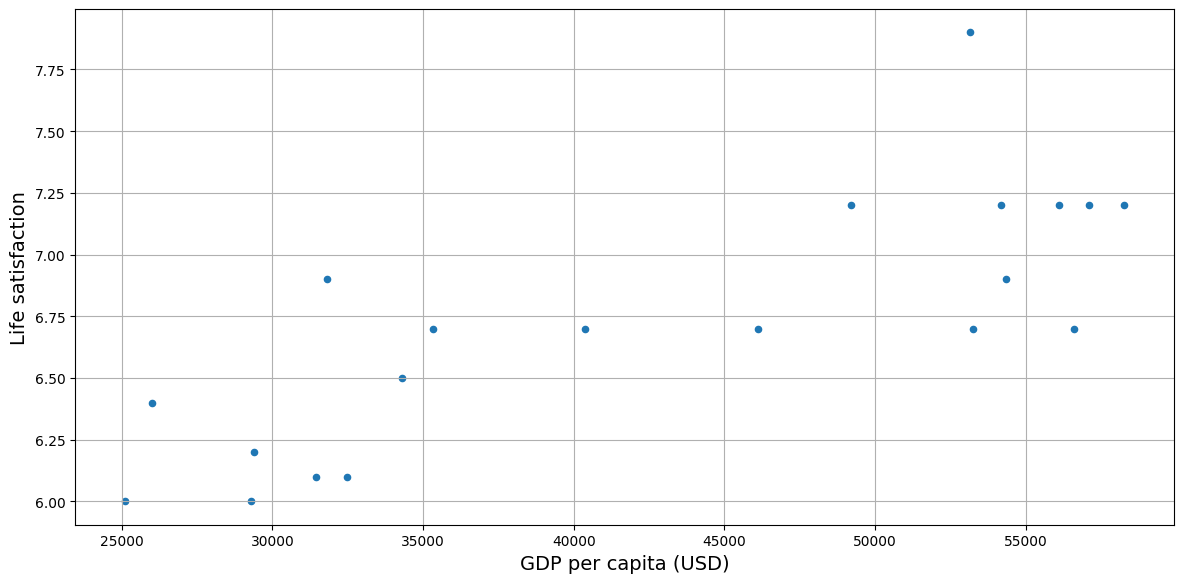

Sample X values: [58268.87876516 56614.5679499  54340.34772247 31823.30782906
 31428.35478161]
Sample y values: [7.2 6.7 6.9 6.9 6.1]


In [85]:
X = df[['GDP per capita (USD)']].values
y = df['Life satisfaction'].values

df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', grid=True, figsize=(12, 6))
plt.tight_layout()
save_fig('lifesat_gdp_scatterplot_selected_countries_pt')
plt.show()

model_regression = LinearRegression()
model_regression.fit(X, y)

print(f"Sample X values: {X[:5].ravel()}")
print(f"Sample y values: {y[:5]}")

In [86]:
t0 = np.atleast_1d(model_regression.intercept_)[0]
t1 = np.atleast_1d(model_regression.coef_.ravel())[0]
print(f"Equação da reta: Satisfação = θ0 + θ1 * PIB per capita")
print(f"Equação da reta: Satisfação = {t0:.2f} + {t1:.2e} * PIB per capita")

Equação da reta: Satisfação = θ0 + θ1 * PIB per capita
Equação da reta: Satisfação = 5.33 + 3.27e-05 * PIB per capita


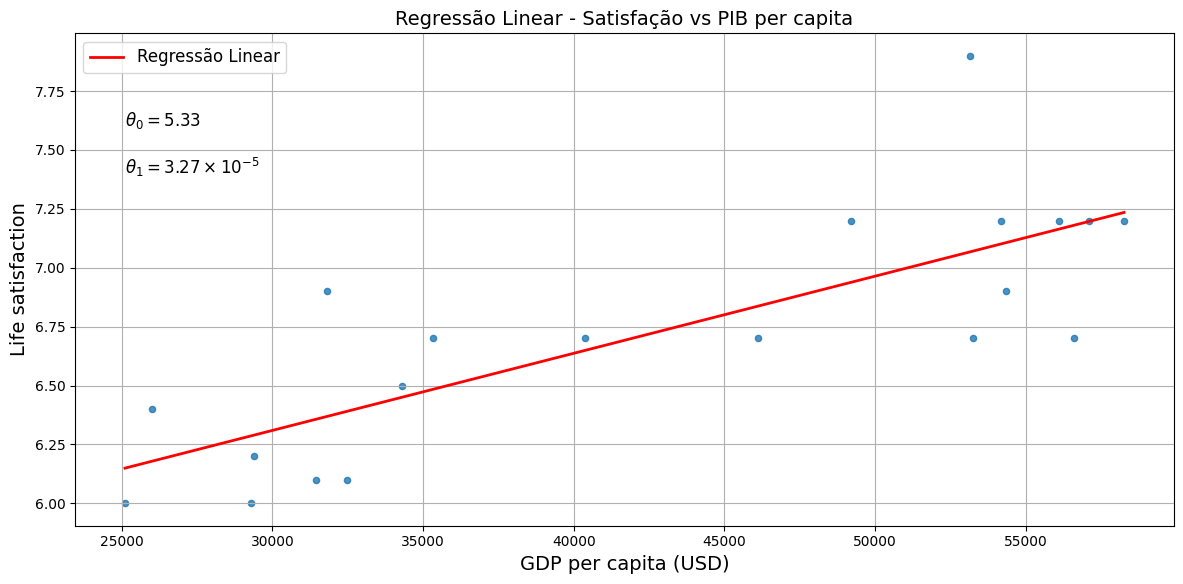

In [87]:
df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction',
        grid=True, figsize=(12, 6), alpha=0.8)

X_line = np.linspace(df['GDP per capita (USD)'].min(),
                     df['GDP per capita (USD)'].max(), 1000).reshape(-1, 1)
y_predict = model_regression.predict(X_line)

plt.plot(X_line, y_predict, color='red', linewidth=2, label="Regressão Linear")

min_gdp = df['GDP per capita (USD)'].min()
max_lifesat = df['Life satisfaction'].max()

plt.text(min_gdp, max_lifesat - 0.30,
         fr"$\theta_0 = {t0:.2f}$", color="black", fontsize=12)
plt.text(min_gdp, max_lifesat - 0.5,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="black", fontsize=12)

plt.title('Regressão Linear - Satisfação vs PIB per capita')
plt.legend()
save_fig('lifesat_gdp_scatterplot_with_line_pt')
plt.tight_layout()
plt.show()

In [90]:
gdp_pc = gdp_countries.copy()
gdp_pc

,Entity,Code,Year,GDP per capita (USD)
198,Albania,ALB,2024,11377.775743
263,Algeria,DZA,2024,5752.990767
339,Andorra,AND,2024,49303.649167
384,Angola,AGO,2024,2665.874448
432,Antigua and Barbuda,ATG,2024,23542.452695
...,...,...,...,...
14179,Vanuatu,VUT,2024,3410.770232
14244,"Venezuela, RB",VEN,2024,4217.591026
14284,Viet Nam,VNM,2024,4717.290287
14495,Zambia,ZMB,2024,1187.109434


In [91]:
cyprus_gdp = (gdp_pc['GDP per capita (USD)'].loc[gdp_pc['Entity'] == 'Cyprus'].values[0])

cyprus_predicted_sat = model_regression.predict(cyprus_gdp.reshape(1, -1))
cyprus_predicted_sat = cyprus_predicted_sat.item()

print(f"Predição de satisfação para Chipre: {cyprus_predicted_sat:.2f}")

Predição de satisfação para Chipre: 6.59


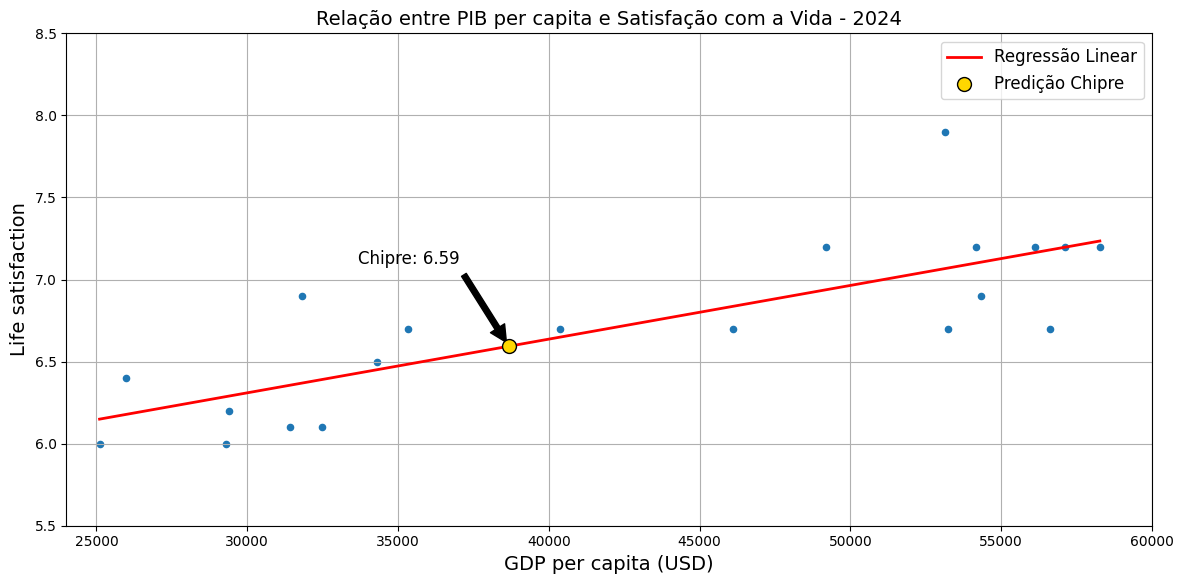

In [92]:
df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', grid=True, figsize=(12, 6))
plt.plot(X_line, y_predict, color='red', linewidth=2, label="Regressão Linear")
plt.scatter(cyprus_gdp, cyprus_predicted_sat, color='gold', s=100, edgecolors='black', zorder=5, label='Predição Chipre')

plt.annotate(f"Chipre: {cyprus_predicted_sat:.2f}", 
             xy=(cyprus_gdp, cyprus_predicted_sat), 
             xytext=(cyprus_gdp - 5000, cyprus_predicted_sat + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.axis([24000, 60000, 5.5, 8.5])
plt.legend()
plt.title("Relação entre PIB per capita e Satisfação com a Vida - 2024")
save_fig('lifesat_gdp_scatterplot_with_line_and_chipre_pt')
plt.tight_layout()
plt.show()

Após 4 anos, o valor do Índice de Satisfação de Chipre subiu de 6.30 para 6.59. Porém, a reta também mudou de inclinação, já que os valores evoluíram ao longo desses anos, tanto no índice de satisfação quanto no PIB per capita dos países nos dados de treino: alguns países saíram da lista, e outros entraram.


In [93]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X, y)

model_knn.predict(cyprus_gdp.reshape(1, -1))

print(f"Predição KNN (k=3) para Chipre 2024: {model_knn.predict(cyprus_gdp.reshape(1, -1))[0]:.2f}")

Predição KNN (k=3) para Chipre 2024: 6.63


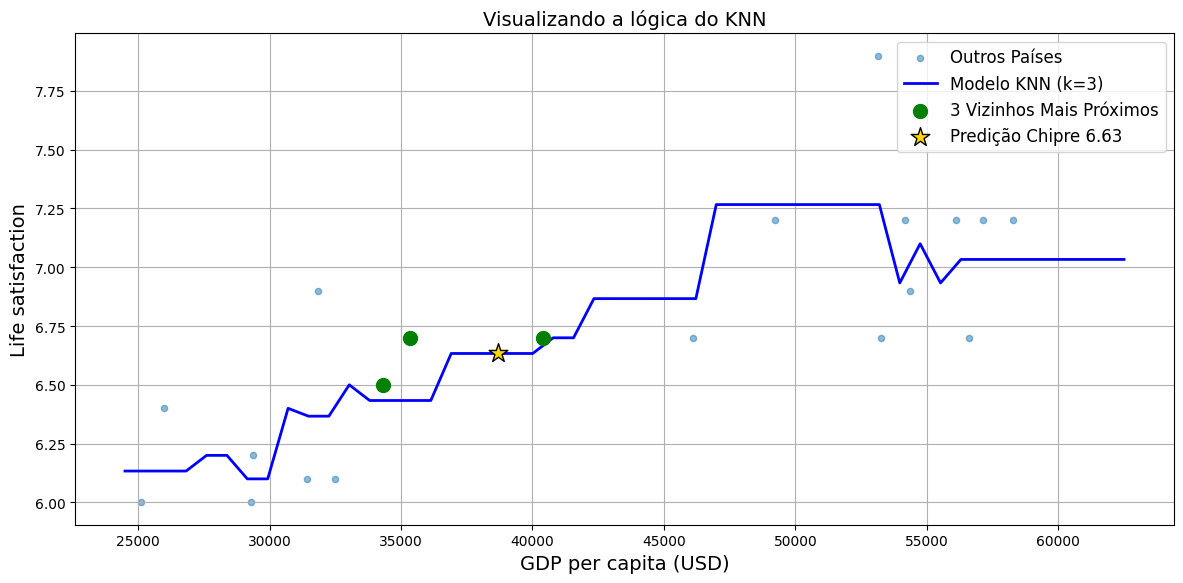

In [94]:
distances, indices = model_knn.kneighbors(cyprus_gdp.reshape(1, -1))

X_smooth = np.linspace(24500, 62500, 50).reshape(-1, 1)
y_knn_pred = model_knn.predict(X_smooth)

df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', 
             grid=True, alpha=0.5, label="Outros Países", figsize=(12, 6))

plt.plot(X_smooth, y_knn_pred, color='blue', label='Modelo KNN (k=3)', linewidth=2)

plt.scatter(X[indices[0]], y[indices[0]], 
            color='green', s=100, label='3 Vizinhos Mais Próximos', zorder=4)

cyprus_pred = model_knn.predict(cyprus_gdp.reshape(1, -1)).item()
plt.scatter(cyprus_gdp, cyprus_pred, color='gold', marker='*', s=200, 
            edgecolors='black', label=f'Predição Chipre {cyprus_pred:.2f}', zorder=5)

plt.legend()
plt.title("Visualizando a lógica do KNN")
save_fig('lifesat_gdp_scatterplot_knn_k3_pt')
plt.tight_layout()
plt.show()

O KNN também apresentou a mesma taxa de evolução, o modelo de 2020 previu 6.33 pontos para Chipre, enquanto o modelo atualizado resultou em 6.63. 

Agora vamos separar os dados dos países que estão dentro do intervalo da análise, porém não se encontram na lista da OECD; portanto, não têm registro de Índice de Satisfação.


In [95]:
gdp_pc_filtered = gdp_countries[(gdp_countries['GDP per capita (USD)'] > 25_000) & (gdp_countries['GDP per capita (USD)'] < 60_000)]
gdp_pc_filtered.head()

,Entity,Code,Year,GDP per capita (USD)
339,Andorra,AND,2024,49303.649167
635,Aruba,ABW,2024,39498.594129
765,Austria,AUT,2024,58268.878765
865,"Bahamas, The",BHS,2024,39455.446655
920,Bahrain,BHR,2024,29653.568273


In [96]:
df.head()

,Country,Life satisfaction,GDP per capita (USD)
1,Austria,7.2,58268.878765
2,Belgium,6.7,56614.567950
4,Canada,6.9,54340.347722
8,Czechia,6.9,31823.307829
10,Estonia,6.1,31428.354782


In [97]:
missing_countries_filtered = gdp_pc_filtered[~gdp_pc_filtered['Entity'].isin(df['Country'])]

print(f"Total de países faltantes no intervalo selecionado: {len(missing_countries_filtered)}")

Total de países faltantes no intervalo selecionado: 18


In [98]:
missing_countries_filtered.head()

,Entity,Code,Year,GDP per capita (USD)
339,Andorra,AND,2024,49303.649167
635,Aruba,ABW,2024,39498.594129
865,"Bahamas, The",BHS,2024,39455.446655
920,Bahrain,BHR,2024,29653.568273
1050,Barbados,BRB,2024,26544.870728


In [99]:
X_missing_filtered = missing_countries_filtered[['GDP per capita (USD)']].values
print(f"Sample X values for missing countries: {X_missing_filtered[:5].ravel()}")

Sample X values for missing countries: [49303.64916743 39498.59412938 39455.44665485 29653.56827315
 26544.87072826]


In [100]:
missing_predictions_filtered = model_regression.predict(X_missing_filtered)

In [101]:
missing_countries_filtered['Predicted Life Satisfaction - Regression'] = missing_predictions_filtered.flatten().round(2)

results = missing_countries_filtered[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction - Regression']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predições realizadas para {len(results)} países.")
results

Predições realizadas para 18 países.


,Entity,GDP per capita (USD),Predicted Life Satisfaction - Regression
5663,"Hong Kong SAR, China",54074.692852,7.10
13835,United Arab Emirates,50273.506047,6.97
339,Andorra,49303.649167,6.94
8472,Malta,43898.578181,6.76
11776,Sint Maarten (Dutch part),41472.587450,6.69
635,Aruba,39498.594129,6.62
865,"Bahamas, The",39455.446655,6.62
11073,Puerto Rico (US),39343.715466,6.62
3023,Cyprus,38674.292969,6.59
13623,Turks and Caicos Islands,37506.779843,6.56


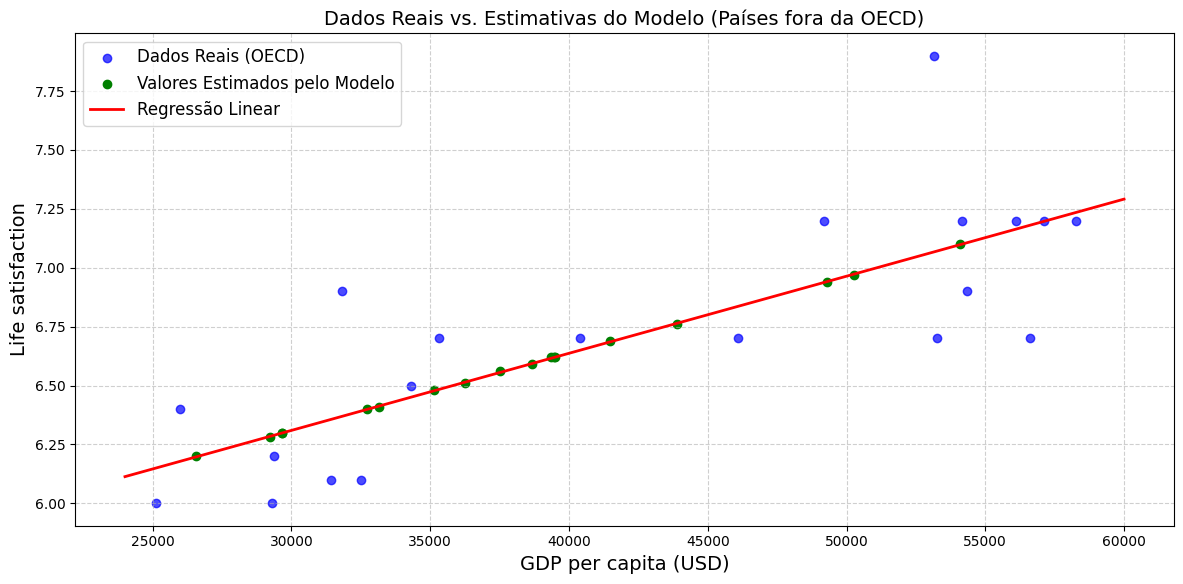

In [102]:
plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (OECD)')

plt.scatter(missing_countries_filtered['GDP per capita (USD)'], missing_countries_filtered['Predicted Life Satisfaction - Regression'], 
            color='green', marker='o', alpha=1, label='Valores Estimados pelo Modelo')

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
plt.plot(X_range, model_regression.predict(X_range), color='red', linewidth=2, label='Regressão Linear')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Estimativas do Modelo (Países fora da OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_predictions_for_missing_countries_pt')
plt.tight_layout()
plt.show()

Com os dados limitados a um mesmo intervalo, que apresenta uma clara tendência de evolução do Índice de Satisfação, os 18 países com valores previstos ficaram bem distribuídos ao longo da reta.


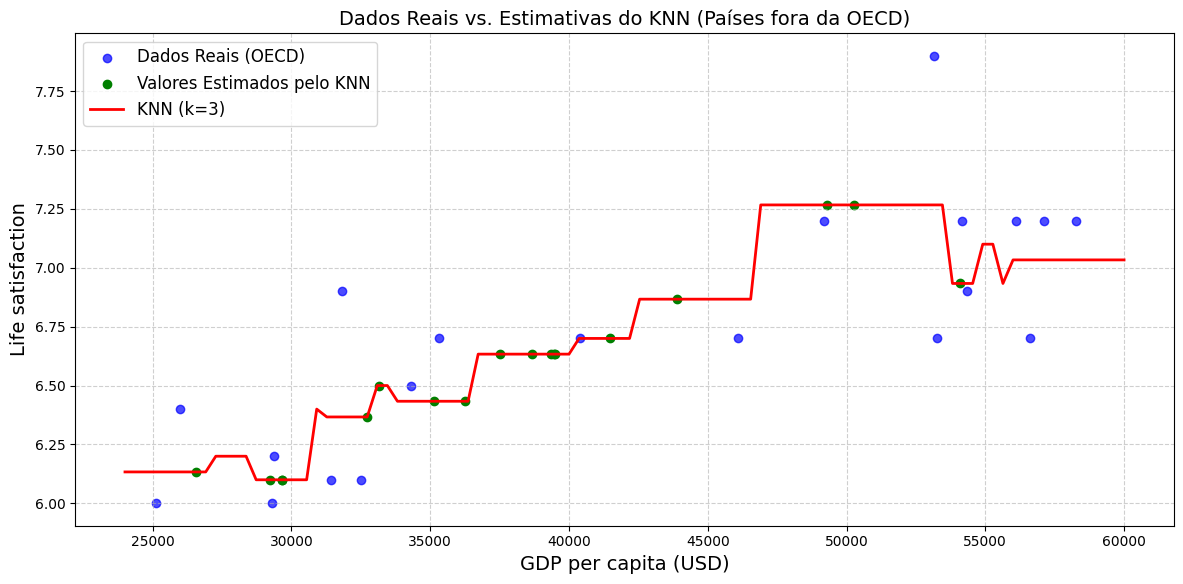

In [103]:
X_train = df[['GDP per capita (USD)']].values
y_train = df['Life satisfaction'].values

model_knn_3 = KNeighborsRegressor(n_neighbors=3)
model_knn_3.fit(X_train, y_train)

X_missing = missing_countries_filtered[['GDP per capita (USD)']].values
missing_countries_filtered['Predicted Life Satisfaction - KNN=3'] = (
    model_knn_3.predict(X_missing)
)

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
y_knn_curve = model_knn_3.predict(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(
    X_train.flatten(), y_train,
    color='blue', alpha=0.7,
    label='Dados Reais (OECD)'
)

plt.scatter(
    X_missing.flatten(),
    missing_countries_filtered['Predicted Life Satisfaction - KNN=3'],
    color='green', marker='o', alpha=1,
    label='Valores Estimados pelo KNN'
)

plt.plot(
    X_range.flatten(), y_knn_curve,
    color='red', linewidth=2,
    label='KNN (k=3)'
)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Estimativas do KNN (Países fora da OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_knn_predictions_for_missing_countries_pt')
plt.tight_layout()
plt.show()

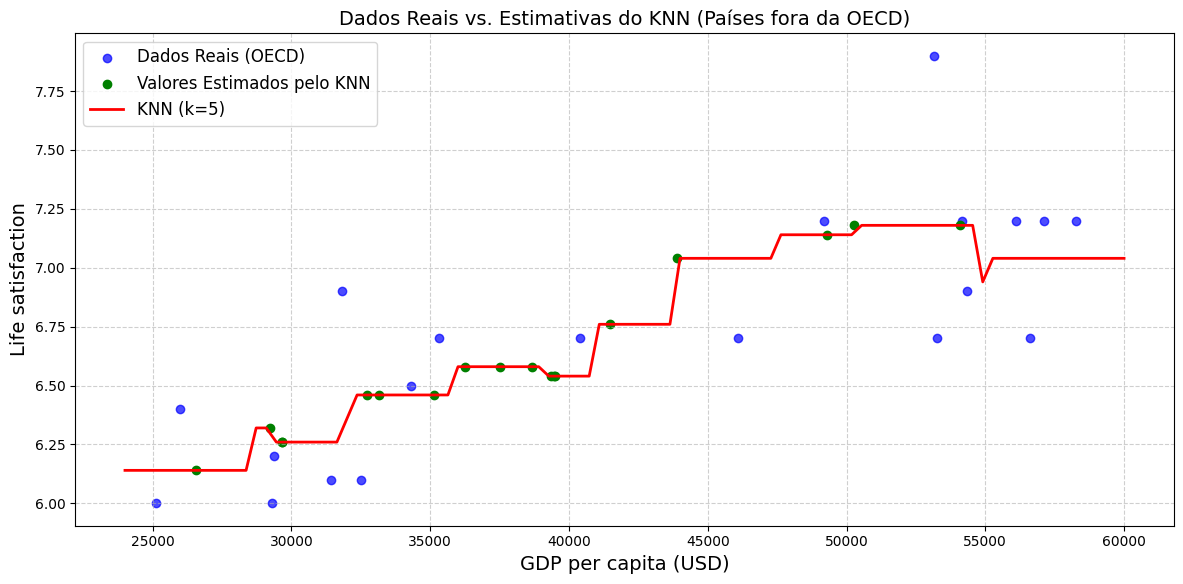

In [104]:
X_train = df[['GDP per capita (USD)']].values
y_train = df['Life satisfaction'].values

model_knn_5 = KNeighborsRegressor(n_neighbors=5)
model_knn_5.fit(X_train, y_train)

X_missing = missing_countries_filtered[['GDP per capita (USD)']].values
missing_countries_filtered['Predicted Life Satisfaction - KNN=5'] = (
    model_knn_5.predict(X_missing)
)

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
y_knn_curve = model_knn_5.predict(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(
    X_train.flatten(), y_train,
    color='blue', alpha=0.7,
    label='Dados Reais (OECD)'
)

plt.scatter(
    X_missing.flatten(),
    missing_countries_filtered['Predicted Life Satisfaction - KNN=5'],
    color='green', marker='o', alpha=1,
    label='Valores Estimados pelo KNN'
)

plt.plot(
    X_range.flatten(), y_knn_curve,
    color='red', linewidth=2,
    label='KNN (k=5)'
)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Estimativas do KNN (Países fora da OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_knn_k5_predictions_for_missing_countries_pt')
plt.tight_layout()
plt.show()

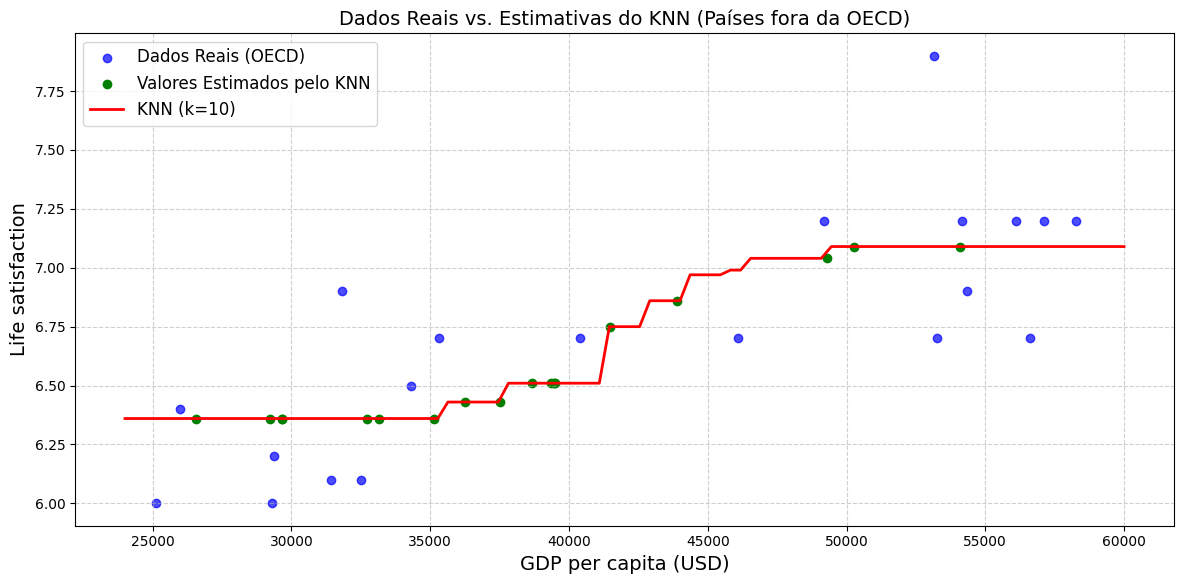

In [105]:
X_train = df[['GDP per capita (USD)']].values
y_train = df['Life satisfaction'].values

model_knn_10 = KNeighborsRegressor(n_neighbors=10)
model_knn_10.fit(X_train, y_train)

X_missing = missing_countries_filtered[['GDP per capita (USD)']].values
missing_countries_filtered['Predicted Life Satisfaction - KNN=10'] = (
    model_knn_10.predict(X_missing)
)

X_range = np.linspace(24000, 60000, 100).reshape(-1, 1)
y_knn_curve = model_knn_10.predict(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(
    X_train.flatten(), y_train,
    color='blue', alpha=0.7,
    label='Dados Reais (OECD)'
)

plt.scatter(
    X_missing.flatten(),
    missing_countries_filtered['Predicted Life Satisfaction - KNN=10'],
    color='green', marker='o', alpha=1,
    label='Valores Estimados pelo KNN'
)

plt.plot(
    X_range.flatten(), y_knn_curve,
    color='red', linewidth=2,
    label='KNN (k=10)'
)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Estimativas do KNN (Países fora da OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_knn_k10_predictions_for_missing_countries_pt')
plt.tight_layout()
plt.show()

In [106]:
diff_reg_knn_3 = (missing_countries_filtered['Predicted Life Satisfaction - Regression'] - missing_countries_filtered['Predicted Life Satisfaction - KNN=3'])
diff_reg_knn_5 = missing_countries_filtered['Predicted Life Satisfaction - Regression'] - missing_countries_filtered['Predicted Life Satisfaction - KNN=5']
diff_reg_knn_10 = missing_countries_filtered['Predicted Life Satisfaction - Regression'] - missing_countries_filtered['Predicted Life Satisfaction - KNN=10']
missing_countries_filtered['Difference (Regression - KNN=3)'] = diff_reg_knn_3
missing_countries_filtered['Difference (Regression - KNN=5)'] = diff_reg_knn_5
missing_countries_filtered['Difference (Regression - KNN=10)'] = diff_reg_knn_10
missing_countries_filtered = missing_countries_filtered.round(2)
missing_countries_filtered.sort_values(by='GDP per capita (USD)', ascending=False)

,Entity,Code,Year,GDP per capita (USD),Predicted Life Satisfaction - Regression,Predicted Life Satisfaction - KNN=3,Predicted Life Satisfaction - KNN=5,Predicted Life Satisfaction - KNN=10,Difference (Regression - KNN=3),Difference (Regression - KNN=5),Difference (Regression - KNN=10)
5663,"Hong Kong SAR, China",HKG,2024,54074.69,7.10,6.93,7.18,7.09,0.17,-0.08,0.01
13835,United Arab Emirates,ARE,2024,50273.51,6.97,7.27,7.18,7.09,-0.30,-0.21,-0.12
339,Andorra,AND,2024,49303.65,6.94,7.27,7.14,7.04,-0.33,-0.20,-0.10
8472,Malta,MLT,2024,43898.58,6.76,6.87,7.04,6.86,-0.11,-0.28,-0.10
11776,Sint Maarten (Dutch part),SXM,2024,41472.59,6.69,6.70,6.76,6.75,-0.01,-0.07,-0.06
635,Aruba,ABW,2024,39498.59,6.62,6.63,6.54,6.51,-0.01,0.08,0.11
865,"Bahamas, The",BHS,2024,39455.45,6.62,6.63,6.54,6.51,-0.01,0.08,0.11
11073,Puerto Rico (US),PRI,2024,39343.72,6.62,6.63,6.54,6.51,-0.01,0.08,0.11
3023,Cyprus,CYP,2024,38674.29,6.59,6.63,6.58,6.51,-0.04,0.01,0.08
13623,Turks and Caicos Islands,TCA,2024,37506.78,6.56,6.63,6.58,6.43,-0.07,-0.02,0.13


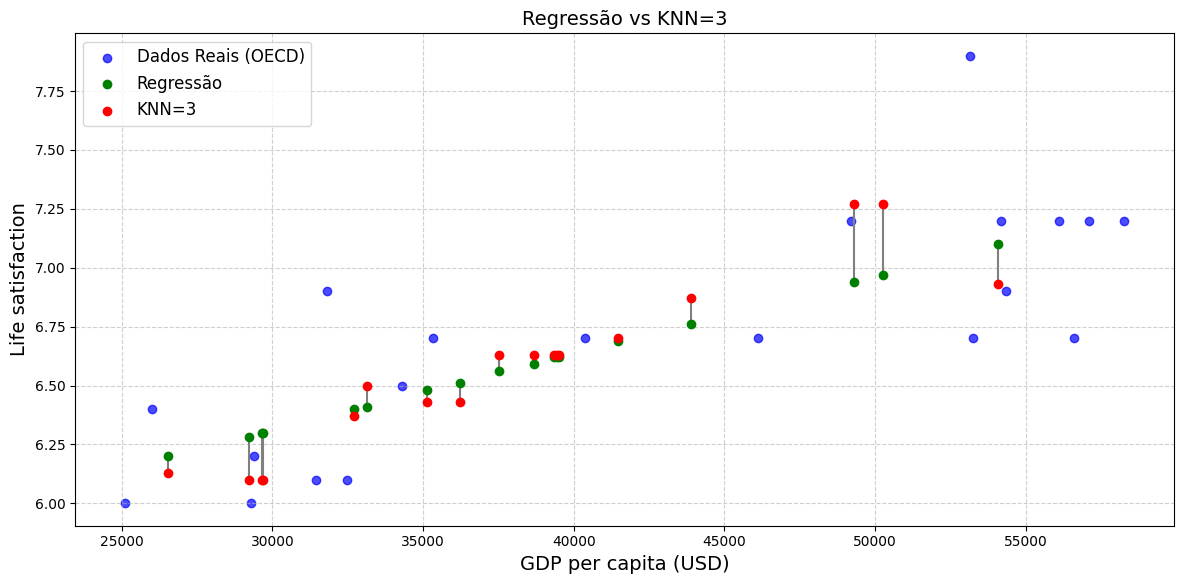

In [107]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Dados Reais (OECD)')
for _, row in df_sorted.iterrows():
    gdp = row['GDP per capita (USD)']
    reg = row['Predicted Life Satisfaction - Regression']
    knn = row['Predicted Life Satisfaction - KNN=3']
    ax.plot([gdp, gdp], [reg, knn], color='gray', linewidth=1.5)
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, label='Regressão')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=3'],
            color='red', zorder=5, label='KNN=3')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Regressão vs KNN=3')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparison_regression_knn_k3_pt')
plt.tight_layout()
plt.show()

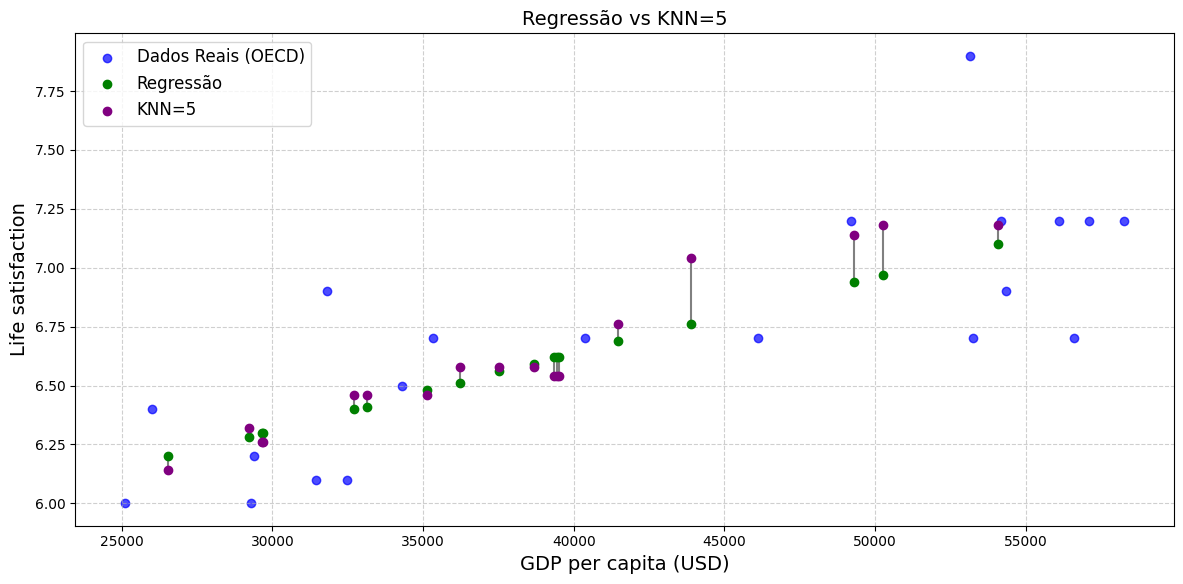

In [108]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Dados Reais (OECD)')
for _, row in df_sorted.iterrows():
    gdp = row['GDP per capita (USD)']
    reg = row['Predicted Life Satisfaction - Regression']
    knn = row['Predicted Life Satisfaction - KNN=5']
    ax.plot([gdp, gdp], [reg, knn], color='gray', linewidth=1.5)
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, label='Regressão')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=5'],
            color='purple', zorder=5, label='KNN=5')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Regressão vs KNN=5')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparison_regression_knn_k5_pt')
plt.tight_layout()
plt.show()

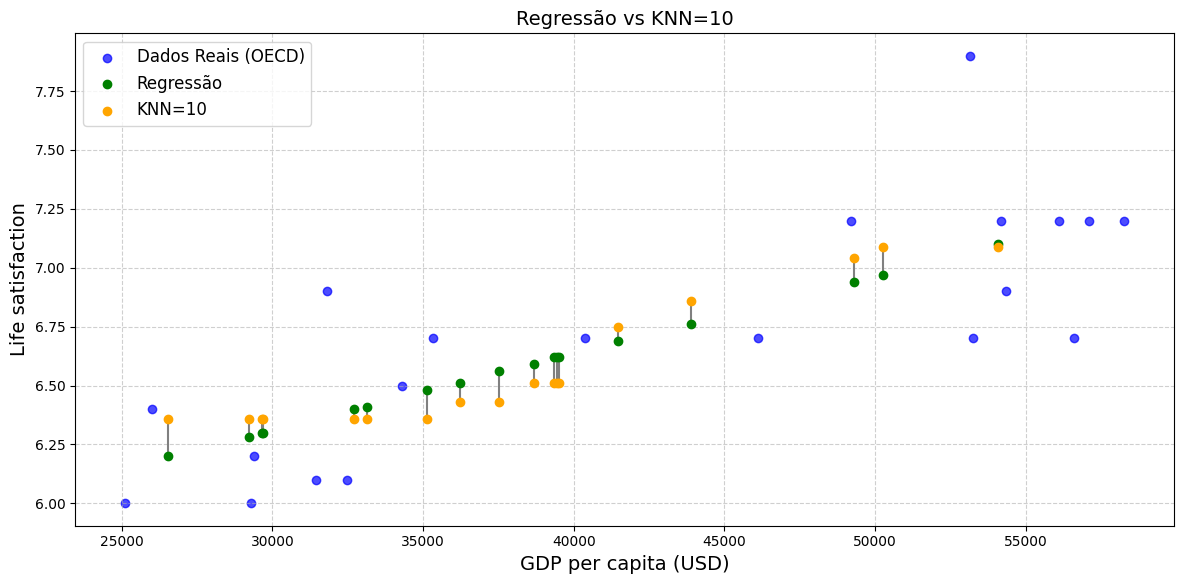

In [109]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Dados Reais (OECD)')
for _, row in df_sorted.iterrows():
    gdp = row['GDP per capita (USD)']
    reg = row['Predicted Life Satisfaction - Regression']
    knn = row['Predicted Life Satisfaction - KNN=10']
    ax.plot([gdp, gdp], [reg, knn], color='gray', linewidth=1.5)
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, label='Regressão')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=10'],
            color='orange', zorder=5, label='KNN=10')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Regressão vs KNN=10')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparison_regression_knn_k10_pt')
plt.tight_layout()
plt.show()

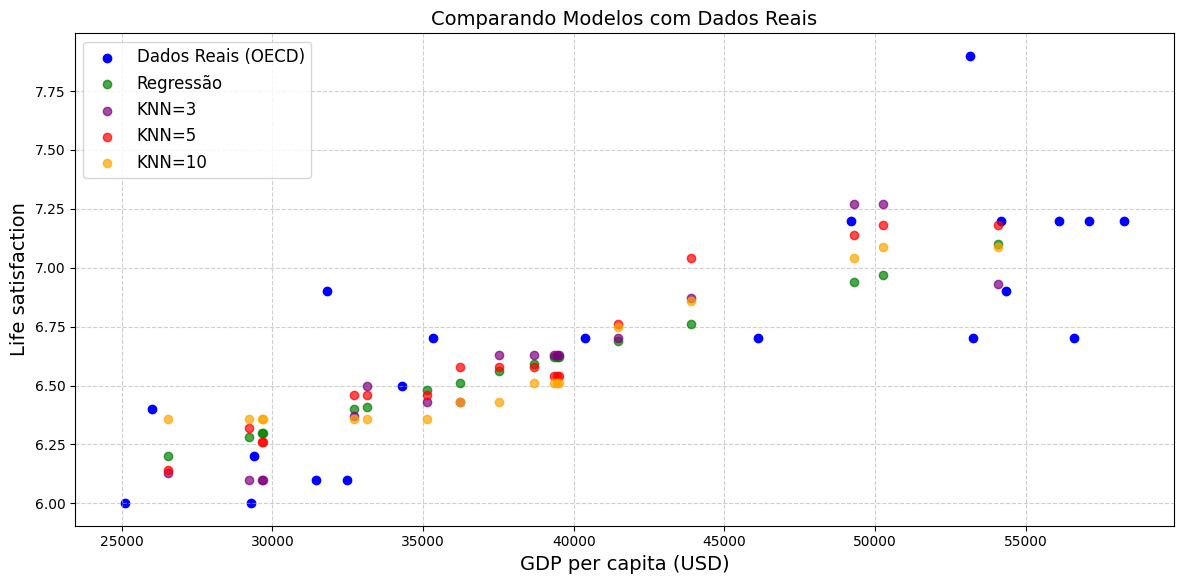

In [110]:
df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train.flatten(), y_train, color='blue', label='Dados Reais (OECD)')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - Regression'],
            color='green', zorder=5, alpha=0.7, label='Regressão')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=3'],
            color='purple', zorder=5, alpha=0.7, label='KNN=3')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=5'],
            color='red', zorder=5, alpha=0.7, label='KNN=5')
ax.scatter(df_sorted['GDP per capita (USD)'],
            df_sorted['Predicted Life Satisfaction - KNN=10'],
            color='orange', zorder=5, alpha=0.7, label='KNN=10')
ax.set_xlabel('GDP per capita (USD)')
ax.set_ylabel('Life satisfaction')
ax.set_title('Comparando Modelos com Dados Reais')
ax.legend()
ax .grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparison_all_models_pt')
plt.tight_layout()
plt.show()

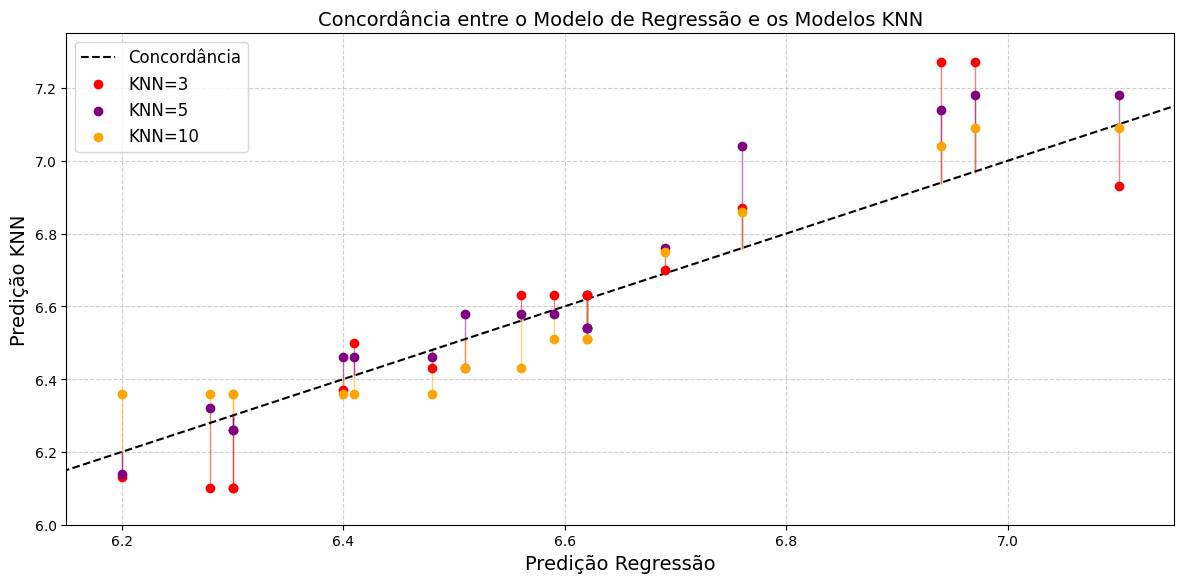

In [111]:
plt.figure(figsize=(12, 6))

reg = missing_countries_filtered['Predicted Life Satisfaction - Regression']
knn3 = missing_countries_filtered['Predicted Life Satisfaction - KNN=3']
knn5 = missing_countries_filtered['Predicted Life Satisfaction - KNN=5']
knn10 = missing_countries_filtered['Predicted Life Satisfaction - KNN=10']

lims = [6.0, 7.5]

for r, k3, k5, k10 in zip(reg, knn3, knn5, knn10):
    plt.plot([r, r], [r, k3], color='red', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k5], color='purple', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k10], color='orange', linewidth=1, alpha=0.5)

plt.plot(lims, lims, 'k--', label='Concordância')

plt.scatter(reg, knn3, color='red', zorder=5, label='KNN=3')
plt.scatter(reg, knn5, color='purple', zorder=5, label='KNN=5')
plt.scatter(reg, knn10, color='orange', zorder=5, label='KNN=10')

plt.xlim(6.15,7.15)
plt.ylim(6,7.35)
plt.xlabel('Predição Regressão')
plt.ylabel('Predição KNN')
plt.title('Concordância entre o Modelo de Regressão e os Modelos KNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_concordance_regression_knn_pt')
plt.tight_layout()
plt.show()

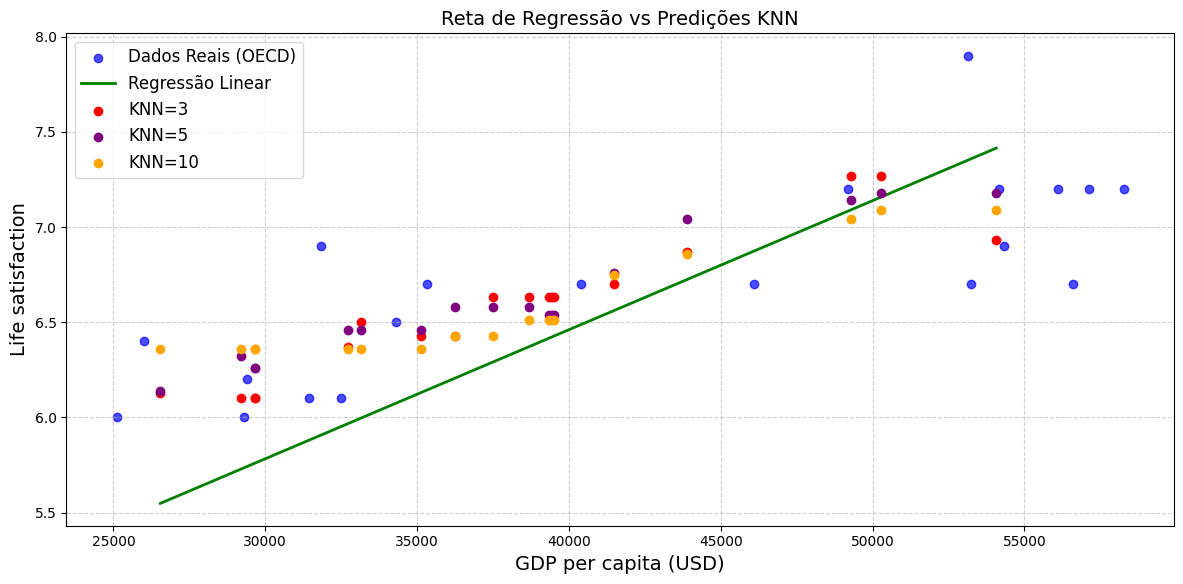

In [112]:
t0 = model.intercept_
t1 = model.coef_[0]

df_sorted = missing_countries_filtered.sort_values('GDP per capita (USD)')

plt.figure(figsize=(12, 6))
plt.scatter(X_train.flatten(), y_train, color='blue', alpha=0.7, label='Dados Reais (OECD)')

X_line = np.linspace(df_sorted['GDP per capita (USD)'].min(), df_sorted['GDP per capita (USD)'].max(), 1000)
plt.plot(X_line, t0 + t1 * X_line, 'g-', linewidth=2, label='Regressão Linear')

plt.scatter(df_sorted['GDP per capita (USD)'], df_sorted['Predicted Life Satisfaction - KNN=3'],
            color='red', zorder=5, label='KNN=3')
plt.scatter(df_sorted['GDP per capita (USD)'], df_sorted['Predicted Life Satisfaction - KNN=5'],
            color='purple', zorder=5, label='KNN=5')
plt.scatter(df_sorted['GDP per capita (USD)'], df_sorted['Predicted Life Satisfaction - KNN=10'],
            color='orange', zorder=5, label='KNN=10')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Reta de Regressão vs Predições KNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_regression_line_vs_knn_predictions_pt')
plt.tight_layout()
plt.show()

Ao comparar os modelos KNN com o modelo de regressão, observa-se que os valores nas extremidades apresentam maior variação em relação à reta. Isso não deve ser interpretado como erro: a regressão linear é um modelo generalista, enquanto o KNN compara as amostras da vizinhança local. Como os dados de treino contêm poucos países no meio do intervalo (entre 35 e 50 mil dólares), o KNN tem mais dificuldade de adaptação nessa região.

Analisando os resultados do KNN com mais profundidade, nota-se que KNN = 10 apresentou desempenho melhor do que KNN = 3. Ainda assim, esse resultado pode ser interpretado como `overfitting`, pois os dados de treinamento contêm apenas 20 países. Como o modelo está configurado para avaliar os 10 vizinhos mais próximos, a previsão passa a depender de metade do conjunto de treino.

O KNN = 5 apresentou a melhor adaptação à quantidade de dados disponível. Em comparação com o KNN = 3 nas extremidades, ele ficou mais próximo da regressão sem evidenciar `overfitting`.


## Avaliando a capacidade dos modelos de prever de forma generalista

In [113]:
missing_countries = gdp_pc[~gdp_pc['Entity'].isin(df['Country'])]
print(f"Total de países faltantes no intervalo selecionado: {len(missing_countries)}")

X_countries = missing_countries[['GDP per capita (USD)']].values

missing_predictions = model_regression.predict(X_countries)
missing_countries['Predicted Life Satisfaction'] = missing_predictions.flatten().round(2)

results = missing_countries[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predições realizadas para {len(results)} países.")
results

Total de países faltantes no intervalo selecionado: 169
Predições realizadas para 169 países.


,Entity,GDP per capita (USD),Predicted Life Satisfaction
9126,Monaco,288001.433369,14.75
1345,Bermuda,142855.374714,10.00
8086,Luxembourg,137781.681659,9.84
6428,Ireland,112894.953241,9.02
12990,Switzerland,103998.186686,8.73
...,...,...,...
2667,"Congo, Dem. Rep.",649.383339,5.35
12023,"Somalia, Fed. Rep.",629.538899,5.35
8194,Madagascar,544.987501,5.35
8239,Malawi,522.570394,5.35


Predições realizadas para 169 países.


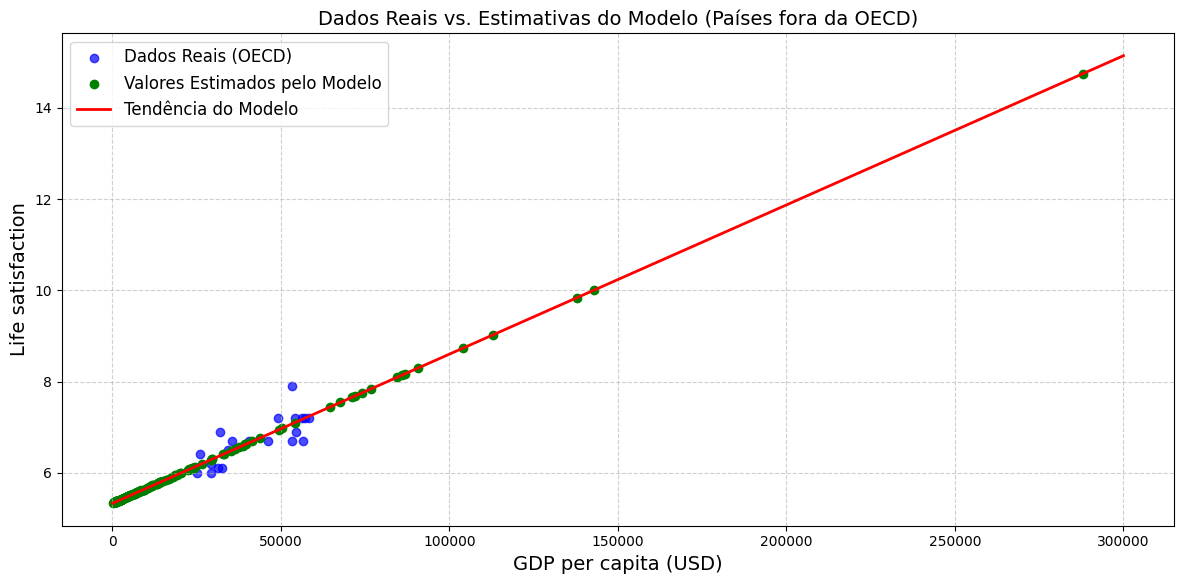

In [114]:
missing_countries = gdp_countries[~gdp_countries['Entity'].isin(df['Country'])]
X_countries = missing_countries[['GDP per capita (USD)']].values

missing_predictions = model_regression.predict(X_countries)
missing_countries['Predicted Life Satisfaction'] = missing_predictions.flatten().round(2)

results = missing_countries[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predições realizadas para {len(results)} países.")

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (OECD)')

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Valores Estimados pelo Modelo')

X_range = np.linspace(0, 300000, 100).reshape(-1, 1)
plt.plot(X_range, model_regression.predict(X_range), color='red', linewidth=2, label='Tendência do Modelo')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Estimativas do Modelo (Países fora da OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_predictions_for_all_missing_countries_pt')
plt.tight_layout()
plt.show()

Como foi visto na análise exploratória, Mônaco se caracteriza nitidamente como um valor atípico (`outlier`).

Sendo assim, vamos refazer desconsiderando a sua presença.


Predições realizadas para 168 países.


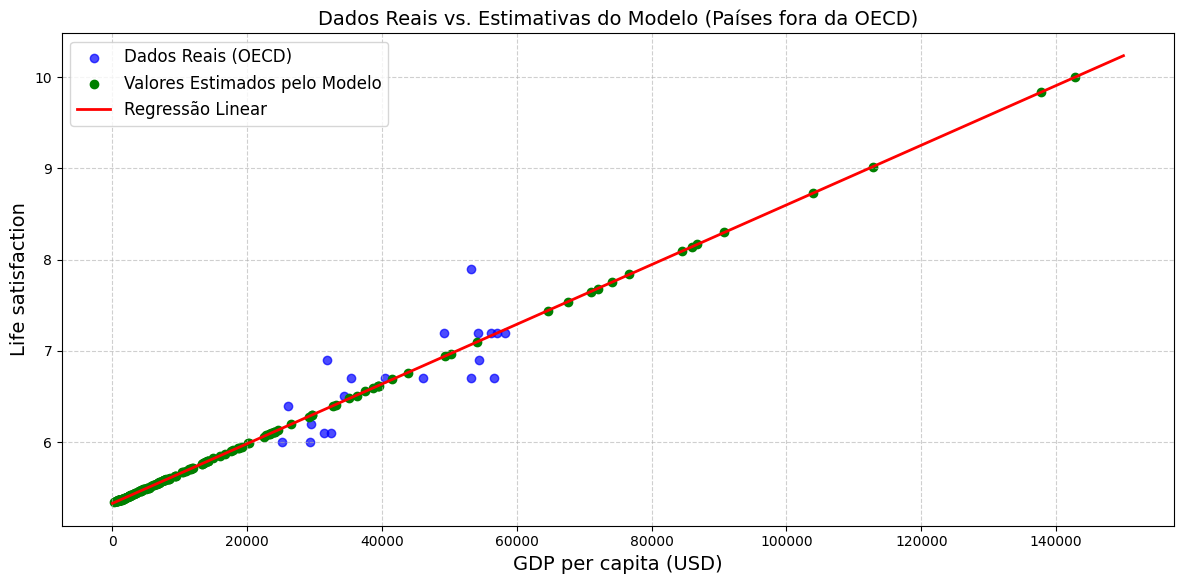

In [115]:
missing_countries = gdp_countries[~gdp_countries['Entity'].isin(df['Country'])]
missing_countries = missing_countries[missing_countries['Entity'] != 'Monaco']
X_countries = missing_countries[['GDP per capita (USD)']].values

missing_predictions = model_regression.predict(X_countries)
missing_countries['Predicted Life Satisfaction'] = missing_predictions.flatten().round(2)

results = missing_countries[['Entity', 'GDP per capita (USD)', 'Predicted Life Satisfaction']].sort_values(by='GDP per capita (USD)', ascending=False)

print(f"Predições realizadas para {len(results)} países.")

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (OECD)')

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Valores Estimados pelo Modelo')

X_range = np.linspace(0, 150000, 100).reshape(-1, 1)
plt.plot(X_range, model_regression.predict(X_range), color='red', linewidth=2, label='Regressão Linear')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Estimativas do Modelo (Países fora da OECD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_with_predictions_for_all_missing_countries_excluding_monaco_pt')
plt.tight_layout()
plt.show()

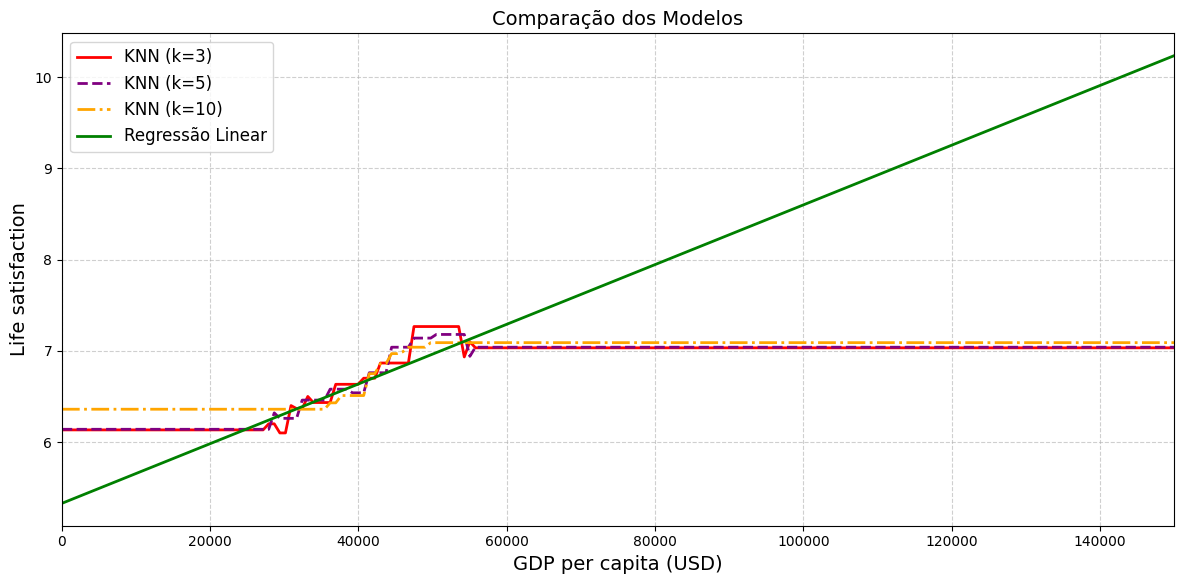

In [116]:

plt.figure(figsize=(12, 6))

X_range = np.linspace(0, 150000, 200).reshape(-1, 1)

for k, color, style in [(3, 'red', '-'), (5, 'purple', '--'), (10, 'orange', '-.')]:
    model_k = KNeighborsRegressor(n_neighbors=k)
    model_k.fit(X_train, y_train)
        
    plt.plot(X_range, model_k.predict(X_range), 
             color=color, linewidth=2, linestyle=style,
             label=f'KNN (k={k})')

plt.plot(X_range, model_regression.predict(X_range), color='green', linewidth=2, label='Regressão Linear')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Comparação dos Modelos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 150000)
save_fig('lifesat_gdp_scatterplot_comparison_regression_knn_all_k_pt')
plt.tight_layout()
plt.show()

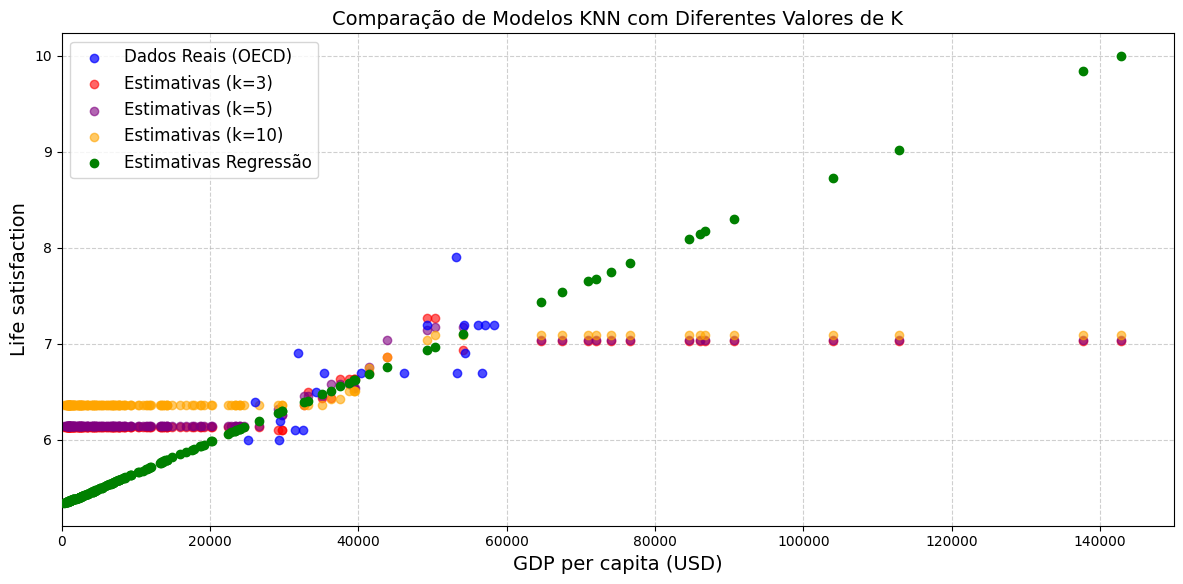

In [117]:

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (OECD)', zorder=3)

X_range = np.linspace(0, 150000, 200).reshape(-1, 1)

for k, color, style in [(3, 'red', '-'), (5, 'purple', '--'), (10, 'orange', '-.')]:
    model_k = KNeighborsRegressor(n_neighbors=k)
    model_k.fit(X_train, y_train)

    missing_countries[f'Pred_k{k}'] = model_k.predict(X_countries)

    plt.scatter(missing_countries['GDP per capita (USD)'], 
                missing_countries[f'Pred_k{k}'], 
                color=color, marker='o', alpha=0.6, 
                label=f'Estimativas (k={k})', zorder=2)

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Estimativas Regressão', zorder=4)


plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Comparação de Modelos KNN com Diferentes Valores de K')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 150000)
save_fig('lifesat_gdp_scatterplot_comparison_knn_all_k_with_regression_pt')
plt.tight_layout()
plt.show()

Aqui confirmamos a questão da qualidade e da representatividade dos dados: não importa o modelo que utilizamos nem a sua configuração. Não é possível fazer previsões para mais de 200 países com base na realidade de apenas 20 países.


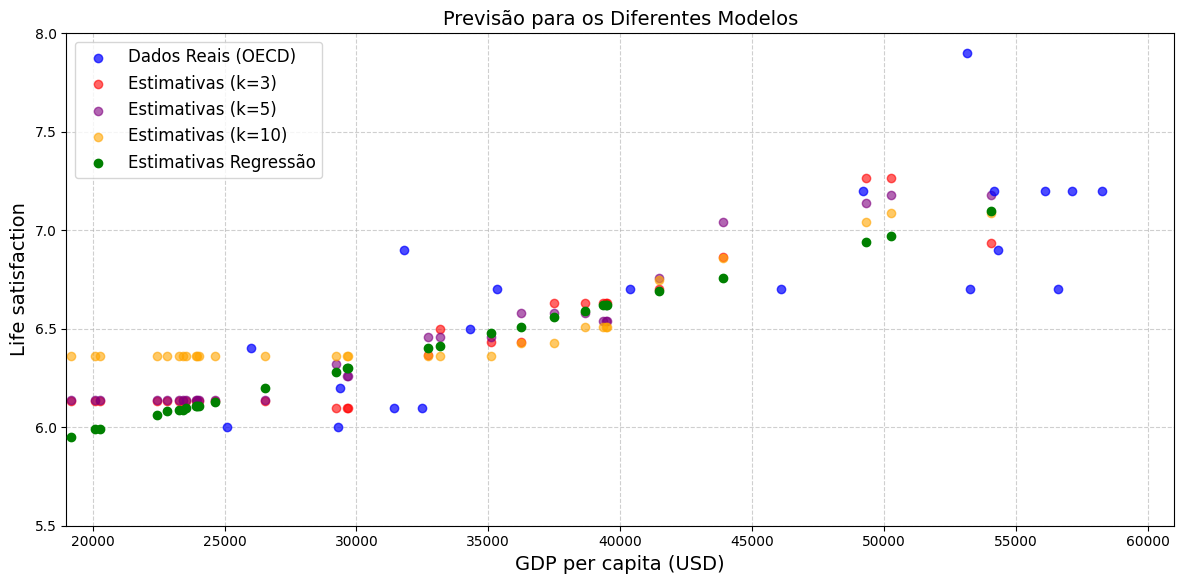

In [118]:

plt.figure(figsize=(12, 6))

plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (OECD)', zorder=3)

X_range = np.linspace(0, 150000, 200).reshape(-1, 1)

for k, color, style in [(3, 'red', '-'), (5, 'purple', '--'), (10, 'orange', '-.')]:
    model_k = KNeighborsRegressor(n_neighbors=k)
    model_k.fit(X_train, y_train)

    missing_countries[f'Pred_k{k}'] = model_k.predict(X_countries)

    plt.scatter(missing_countries['GDP per capita (USD)'], 
                missing_countries[f'Pred_k{k}'], 
                color=color, marker='o', alpha=0.6, 
                label=f'Estimativas (k={k})', zorder=2)

plt.scatter(missing_countries['GDP per capita (USD)'], missing_countries['Predicted Life Satisfaction'], 
            color='green', marker='o', alpha=1, label='Estimativas Regressão', zorder=4)


plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Previsão para os Diferentes Modelos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(19000, 61000)
plt.ylim(5.5, 8)
save_fig('lifesat_gdp_scatterplot_comparison_knn_all_k_with_regression_zoom_pt')
plt.tight_layout()
plt.show()

Quando avaliamos somente o intervalo do PIB dos dados de treino, podemos ver o real desempenho de cada um dos modelos. 

## Treinando modelo com todos os países disponíveis

Na última parte deste estudo, vamos treinar um modelo com todos os países disponíveis na OECD. Para lidar com a representatividade dos dados, vamos filtrar o conjunto de dados com um intervalo próximo ao dos países que se encontram dentro do mesmo intervalo de PIB.


In [119]:
print(f"Total de países com dados no dataset OECD: {len(df_raw)}")
print(f"Menor valor de PIB per capita (USD) entre os países com dados de Satisfação: U${df_raw['GDP per capita (USD)'].min():,.2f}")
print(f"Maior valor de PIB per capita (USD) entre os países com dados de Satisfação: U${df_raw['GDP per capita (USD)'].max():,.2f}")
df_raw.describe()

Total de países com dados no dataset OECD: 37
Menor valor de PIB per capita (USD) entre os países com dados de Satisfação: U$7,919.21
Maior valor de PIB per capita (USD) entre os países com dados de Satisfação: U$137,781.68


,Life satisfaction,GDP per capita (USD)
count,37.000000,37.000000
mean,6.729730,48866.928077
std,0.591545,29806.539967
min,5.700000,7919.208868
25%,6.200000,25992.674850
50%,6.700000,46103.084086
75%,7.200000,58268.878765
max,7.900000,137781.681659


Filtrando o conjunto de dados de PIB com o intervalo do PIB da OECD.

Vamos utilizar como valor mínimo U$5,000.00 e máximo U$150,000.00.


In [120]:
gdp_countries_filtered = gdp_countries[
    (gdp_countries['GDP per capita (USD)'] > 5000) &
    (gdp_countries['GDP per capita (USD)'] < 150000)
    ].sort_values(by='GDP per capita (USD)', ascending=False)
gdp_countries_filtered

,Entity,Code,Year,GDP per capita (USD)
1345,Bermuda,BMU,2024,142855.374714
8086,Luxembourg,LUX,2024,137781.681659
6428,Ireland,IRL,2024,112894.953241
12990,Switzerland,CHE,2024,103998.186686
11760,Singapore,SGP,2024,90674.066633
...,...,...,...,...
3725,El Salvador,SLV,2024,5579.659692
11323,Samoa,WSM,2024,5392.877619
13780,Ukraine,UKR,2024,5389.473145
1909,Cabo Verde,CPV,2024,5192.481573


In [121]:
missing_countries_filtered = gdp_countries_filtered[~gdp_countries_filtered['Entity'].isin(df_raw['Country'])]
print(f"Total de países faltantes no intervalo selecionado: {len(missing_countries_filtered)}")
missing_countries_filtered.describe()

Total de países faltantes no intervalo selecionado: 83


,Year,GDP per capita (USD)
count,83.0,83.000000
mean,2024.0,22126.740398
std,0.0,22533.626737
min,2024.0,5190.169590
25%,2024.0,7688.498600
50%,2024.0,13609.158838
75%,2024.0,29433.380296
max,2024.0,142855.374714


### Treinando modelos com dados completos

Agora temos 37 países para treinar o modelo e 83 países para realizar previsões.


In [122]:
X_full = df_raw[['GDP per capita (USD)']].values
y_full = df_raw[['Life satisfaction']].values


regression_full = LinearRegression()
regression_full.fit(X_full, y_full)

knn_3_full = KNeighborsRegressor(n_neighbors=3)
knn_3_full.fit(X_full, y_full)

knn_5_full = KNeighborsRegressor(n_neighbors=5)
knn_5_full.fit(X_full, y_full)

knn_10_full = KNeighborsRegressor(n_neighbors=15)
knn_10_full.fit(X_full, y_full)

print("Modelos treinados com o dataset completo (todos os países com dados de Satisfação)")

Modelos treinados com o dataset completo (todos os países com dados de Satisfação)


In [123]:
full_countries_predictions = missing_countries_filtered[['Entity', 'GDP per capita (USD)']].round(2).copy()

full_countries_predictions['Predicted Life Satisfaction - Regression'] = regression_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
full_countries_predictions['Predicted Life Satisfaction - KNN=3'] = knn_3_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
full_countries_predictions['Predicted Life Satisfaction - KNN=5'] = knn_5_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
full_countries_predictions['Predicted Life Satisfaction - KNN=10'] = knn_10_full.predict(missing_countries_filtered[['GDP per capita (USD)']].values).flatten().round(2)
print(f"Predições realizadas para {len(full_countries_predictions)} países usando o dataset completo.")
full_countries_predictions.sort_values(by='GDP per capita (USD)', ascending=False).head()


Predições realizadas para 83 países usando o dataset completo.


,Entity,GDP per capita (USD),Predicted Life Satisfaction - Regression,Predicted Life Satisfaction - KNN=3,Predicted Life Satisfaction - KNN=5,Predicted Life Satisfaction - KNN=10
1345,Bermuda,142855.37,8.16,7.37,7.42,7.22
11760,Singapore,90674.07,7.36,7.30,7.36,7.17
11128,Qatar,76688.69,7.15,7.27,7.36,7.21
4298,Faroe Islands,74119.66,7.11,7.30,7.32,7.20
8129,"Macao SAR, China",72004.74,7.08,7.30,7.20,7.20


In [124]:
diff_reg_knn_3_full = (full_countries_predictions['Predicted Life Satisfaction - Regression'] - full_countries_predictions['Predicted Life Satisfaction - KNN=3'])
diff_reg_knn_5_full = full_countries_predictions['Predicted Life Satisfaction - Regression'] - full_countries_predictions['Predicted Life Satisfaction - KNN=5']
diff_reg_knn_10_full = full_countries_predictions['Predicted Life Satisfaction - Regression'] - full_countries_predictions['Predicted Life Satisfaction - KNN=10']
full_countries_predictions['Difference (Regression - KNN=3)'] = diff_reg_knn_3_full
full_countries_predictions['Difference (Regression - KNN=5)'] = diff_reg_knn_5_full
full_countries_predictions['Difference (Regression - KNN=10)'] = diff_reg_knn_10_full
full_countries_predictions = full_countries_predictions.round(2)
full_countries_predictions.sort_values(by='GDP per capita (USD)', ascending=False).head(10)

,Entity,GDP per capita (USD),Predicted Life Satisfaction - Regression,Predicted Life Satisfaction - KNN=3,Predicted Life Satisfaction - KNN=5,Predicted Life Satisfaction - KNN=10,Difference (Regression - KNN=3),Difference (Regression - KNN=5),Difference (Regression - KNN=10)
1345,Bermuda,142855.37,8.16,7.37,7.42,7.22,0.79,0.74,0.94
11760,Singapore,90674.07,7.36,7.30,7.36,7.17,0.06,0.00,0.19
11128,Qatar,76688.69,7.15,7.27,7.36,7.21,-0.12,-0.21,-0.06
4298,Faroe Islands,74119.66,7.11,7.30,7.32,7.20,-0.19,-0.21,-0.09
8129,"Macao SAR, China",72004.74,7.08,7.30,7.20,7.20,-0.22,-0.12,-0.12
5663,"Hong Kong SAR, China",54074.69,6.81,6.93,7.18,7.08,-0.12,-0.37,-0.27
13835,United Arab Emirates,50273.51,6.75,7.27,7.18,7.01,-0.52,-0.43,-0.26
339,Andorra,49303.65,6.74,7.27,7.14,6.93,-0.53,-0.40,-0.19
8472,Malta,43898.58,6.65,6.87,7.04,6.85,-0.22,-0.39,-0.20
11776,Sint Maarten (Dutch part),41472.59,6.62,6.70,6.76,6.73,-0.08,-0.14,-0.11


<Figure size 1200x600 with 0 Axes>

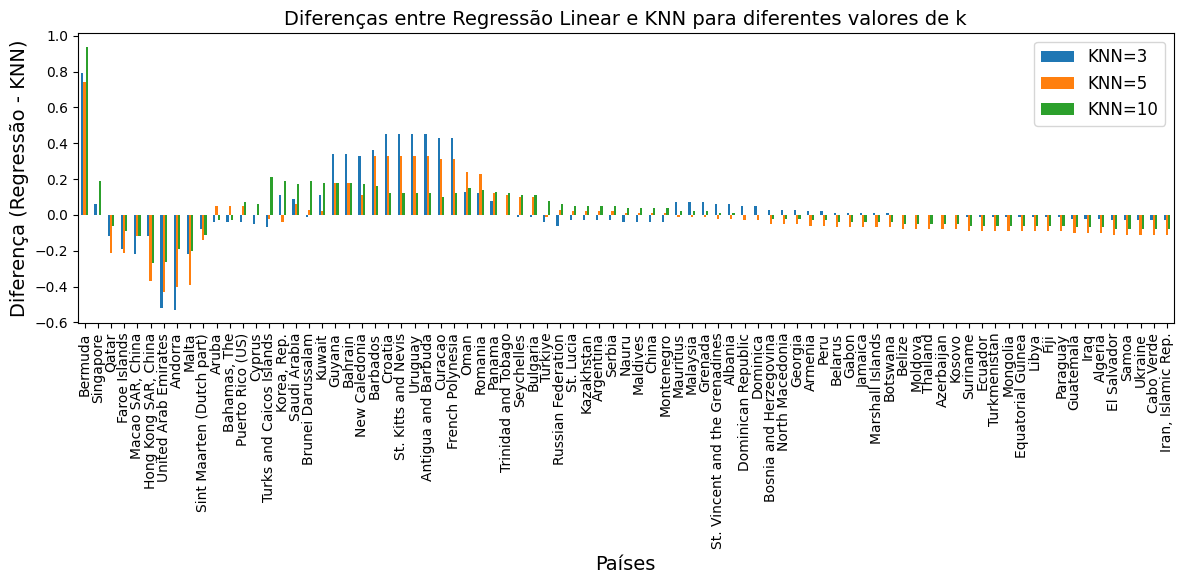

In [125]:
df_diff = full_countries_predictions[['Entity', 'GDP per capita (USD)', 'Difference (Regression - KNN=3)', 'Difference (Regression - KNN=5)', 'Difference (Regression - KNN=10)']].copy()
df_diff = df_diff.sort_values(by='GDP per capita (USD)', ascending=False)

plt.figure(figsize=(12, 6))
df_diff[['Difference (Regression - KNN=3)', 'Difference (Regression - KNN=5)', 'Difference (Regression - KNN=10)']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Países')
plt.ylabel('Diferença (Regressão - KNN)')
plt.xticks(ticks=range(len(df_diff)), labels=df_diff['Entity'], rotation=90)
plt.title('Diferenças entre Regressão Linear e KNN para diferentes valores de k')
plt.legend(['KNN=3', 'KNN=5', 'KNN=10'])
save_fig('lifesat_gdp_barplot_differences_regression_knn_all_k_pt')
plt.tight_layout()
plt.show()

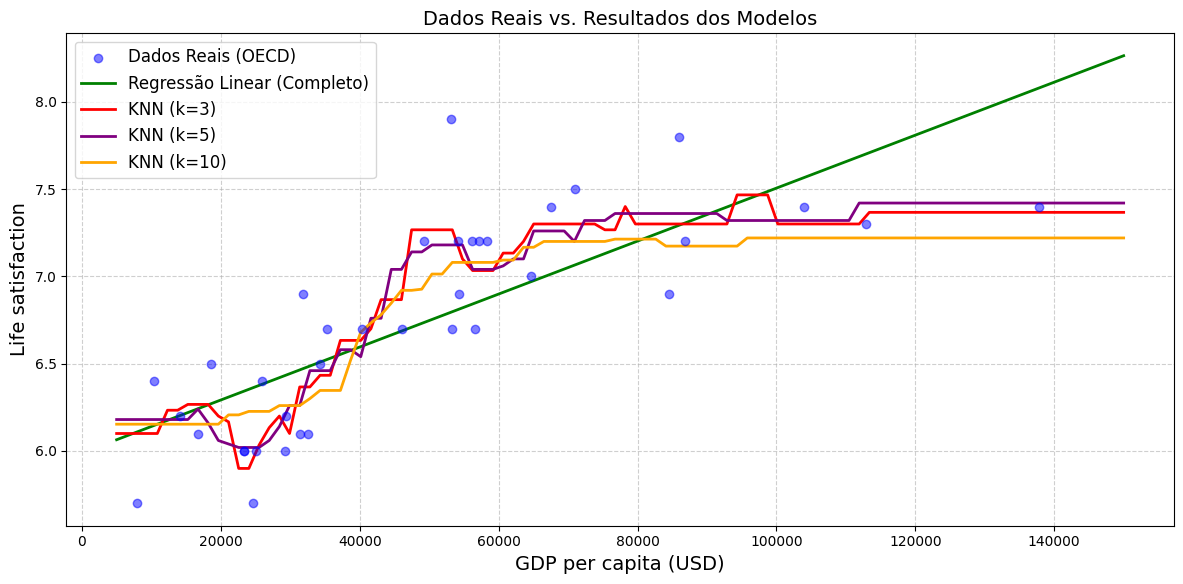

In [126]:
plt.figure(figsize=(12, 6))

plt.scatter(df_raw['GDP per capita (USD)'], df_raw['Life satisfaction'],
            color='blue', alpha=0.5, label='Dados Reais (OECD)', zorder=3)

X_range = np.linspace(5000, 150000, 100).reshape(-1, 1)

plt.plot(X_range, regression_full.predict(X_range), color='green', linewidth=2, label='Regressão Linear (Completo)')
plt.plot(X_range, knn_3_full.predict(X_range), color='red', linewidth=2, label='KNN (k=3)')
plt.plot(X_range, knn_5_full.predict(X_range), color='purple', linewidth=2, label='KNN (k=5)')
plt.plot(X_range, knn_10_full.predict(X_range), color='orange', linewidth=2, label='KNN (k=10)')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Dados Reais vs. Resultados dos Modelos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_comparison_all_models_full_dataset_pt')
plt.tight_layout()
plt.show()

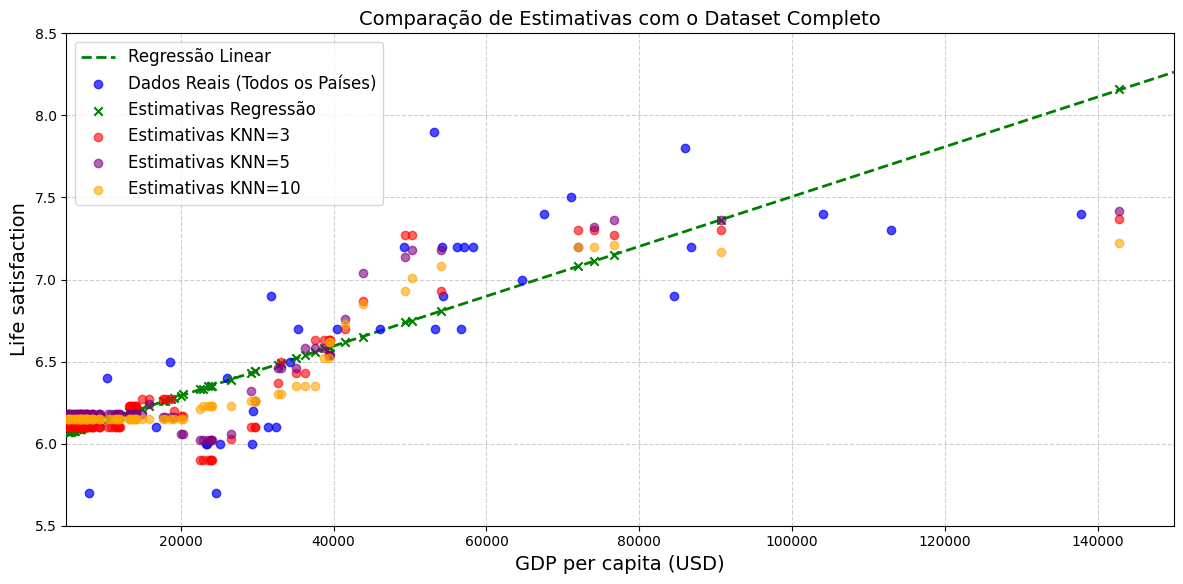

In [127]:
plt.figure(figsize=(12, 6))

X_range = np.linspace(5000, 150000, 100).reshape(-1, 1)
plt.plot(X_range, regression_full.predict(X_range), color='green', linewidth=2, linestyle='--',label='Regressão Linear')

plt.scatter(df_raw['GDP per capita (USD)'], df_raw['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (Todos os Países)', zorder=3)

plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - Regression'], 
            color='green', marker='x', alpha=1, label='Estimativas Regressão', zorder=4)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=3'], 
            color='red', marker='o', alpha=0.6, label='Estimativas KNN=3', zorder=5)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=5'], 
            color='purple', marker='o', alpha=0.6, label='Estimativas KNN=5', zorder=5)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=10'], 
            color='orange', marker='o', alpha=0.6, label='Estimativas KNN=10', zorder=5)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Comparação de Estimativas com o Dataset Completo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(5000, 150000)
plt.ylim(5.5, 8.5)
save_fig('lifesat_gdp_scatterplot_comparison_all_models_full_dataset_zoom_pt')
plt.tight_layout()
plt.show()

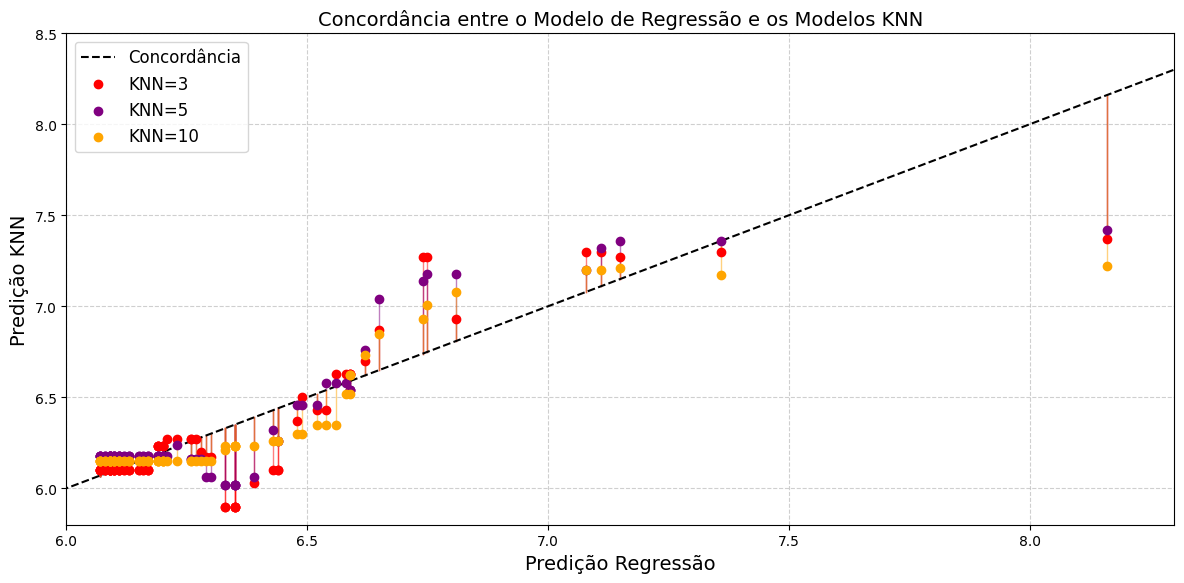

In [128]:
plt.figure(figsize=(12, 6))

reg = full_countries_predictions['Predicted Life Satisfaction - Regression']
knn3 = full_countries_predictions['Predicted Life Satisfaction - KNN=3']
knn5 = full_countries_predictions['Predicted Life Satisfaction - KNN=5']
knn10 = full_countries_predictions['Predicted Life Satisfaction - KNN=10']

lims = [5.0, 8.5]

for r, k3, k5, k10 in zip(reg, knn3, knn5, knn10):
    plt.plot([r, r], [r, k3], color='red', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k5], color='purple', linewidth=1, alpha=0.5)
    plt.plot([r, r], [r, k10], color='orange', linewidth=1, alpha=0.5)

plt.plot(lims, lims, 'k--', label='Concordância')

plt.scatter(reg, knn3, color='red', zorder=5, label='KNN=3')
plt.scatter(reg, knn5, color='purple', zorder=5, label='KNN=5')
plt.scatter(reg, knn10, color='orange', zorder=5, label='KNN=10')

plt.xlim(6, 8.3)
plt.ylim(5.8, 8.5)
plt.xlabel('Predição Regressão')
plt.ylabel('Predição KNN')
plt.title('Concordância entre o Modelo de Regressão e os Modelos KNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
save_fig('lifesat_gdp_scatterplot_concordance_regression_knn_full_dataset_pt')
plt.tight_layout()
plt.show()

Entre os modelos testados, o modelo K = 10 apresentou um bom resultado ao prever os Índices de Satisfação dos países. Ele demonstrou capacidade de realizar previsões de forma generalista e teve pouca variação em relação à regressão linear, exceto para o último país, o que nos leva a uma observação que vou fazer no próximo bloco.


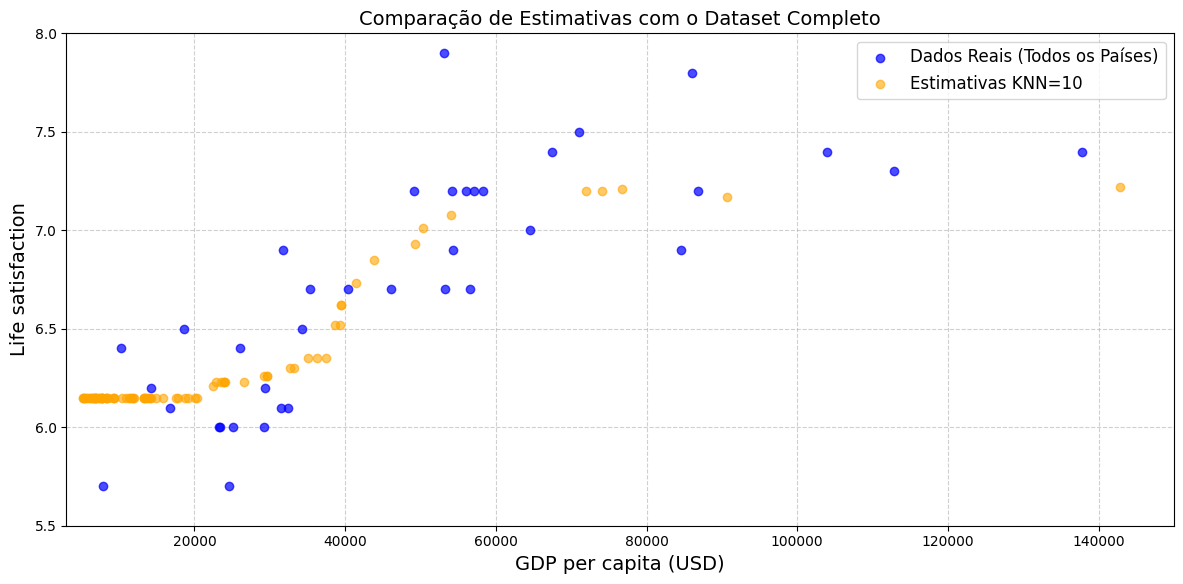

In [129]:
plt.figure(figsize=(12, 6))

plt.scatter(df_raw['GDP per capita (USD)'], df_raw['Life satisfaction'], 
            color='blue', alpha=0.7, label='Dados Reais (Todos os Países)', zorder=3)
plt.scatter(full_countries_predictions['GDP per capita (USD)'], full_countries_predictions['Predicted Life Satisfaction - KNN=10'], 
            color='orange', marker='o', alpha=0.6, label='Estimativas KNN=10', zorder=5)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Comparação de Estimativas com o Dataset Completo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(3000, 150000)
plt.ylim(5.5, 8)
save_fig('lifesat_gdp_scatterplot_comparison_knn_k10_full_dataset_zoom_pt')
plt.tight_layout()
plt.show()

In [130]:
df_raw.loc[df_raw['GDP per capita (USD)'].idxmax()]

Country                    Luxembourg
Life satisfaction                 7.4
GDP per capita (USD)    137781.681659
Name: 23, dtype: object

In [131]:
df_raw.loc[df_raw['Life satisfaction'].idxmax()]

Country                      Finland
Life satisfaction                7.9
GDP per capita (USD)    53149.767193
Name: 11, dtype: object

Como podemos ver na distribuição dos dados reais e estimados, a partir de um determinado PIB per capita, a satisfação da população deixa de crescer de forma proporcional à riqueza.

Luxemburgo, que tem o maior PIB per capita, não apresenta uma população tão satisfeita quanto a da Finlândia, cujo PIB per capita é menos da metade do de Luxemburgo.

Para este estudo, o modelo de regressão serviu como balizador, mas, na prática, não apresentou bom desempenho generalista. Já o modelo KNN se adaptou melhor aos dados e apresentou resultado mais realista.

Como o conjunto de dados sofre com problemas de representatividade, com muitos registros concentrados em um intervalo bem definido e pouca cobertura de países muito ricos ou muito pobres, a regressão linear simples e até mesmo o KNN, ao desconsiderarem as particularidades de cada local, falham como modelos generalistas.

Em um próximo estudo, o ideal é testar uma regressão linear múltipla usando outras colunas do conjunto de dados da OECD e combinar modelos de clusterização para identificar países com realidades semelhantes, não apenas pelo PIB per capita.
